# Exploratory Data Analysis (EDA)

## Load extended packages

In [1]:
#data science packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, f_regression, mutual_info_regression

#visualisation packages
import plotly.io as pio
import plotly.graph_objects as go
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colorbar as mcb
import seaborn as sns
from plotly.subplots import make_subplots
from scipy.stats import gaussian_kde

# time-series packages
from datetime import datetime
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
import random
from statsmodels.tsa.arima.model import ARIMA
from statsmodels import robust
from numpy import polyfit, poly1d
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


## Load datasets

In [2]:
air_df = pd.read_csv('../778project/christchurch_data.csv')
air_df

Date  Daily Average CO (mg/m3)  Daily Average NO (ug/m3)  \
0     2020-01-01                  0.245330                 30.019470   
1     2020-01-02                  0.274290                 26.078985   
2     2020-01-03                  0.255413                 31.498913   
3     2020-01-04                  0.100029                 12.947029   
4     2020-01-05                  0.154580                 16.044275   
...          ...                       ...                       ...   
1456  2023-12-27                  0.295114                 24.239344   
1457  2023-12-28                  0.261138                 18.045330   
1458  2023-12-29                  0.314789                 17.724737   
1459  2023-12-30                  0.278242                 12.919633   
1460  2023-12-31                  0.245410                  5.847671   

      Daily Average NO2 (ug/m3)  Daily Average SO2 (ug/m3)  \
0                     21.876212                   2.470833   
1                     16.849493                   2.604565   
2                     19.870507                   2.267464   
3                     11.675290                   1.918478   
4                     13.878913                   2.063841   
...                         ...                        ...   
1456                  13.726013                        NaN   
1457                   9.393434                        NaN   
1458                  14.168251                        NaN   
1459                  11.949965                        NaN   
1460                   5.089541                        NaN   

      Daily Average PM2.5 (ug/m3)  Daily Average PM10 (ug/m3) WDir(Deg)  \
0                        9.482609                   25.756522        35   
1                       15.187500                   24.491667       308   
2                        6.595833                   14.275000       207   
3                        3.162500                   12.262500       231   
4                        6.254167                   22.204167        59   
...                           ...                         ...       ...   
1456                     2.175879                    5.334532        19   
1457                     3.944295                    8.552974        49   
1458                     7.550594                   16.320599        67   
1459                     1.884365                    6.143038       214   
1460                     3.377318                    9.244344       356   

     WSpd(m/s) GustDir(Deg)  ... ET10(C) ET20(C) ET30(C) ET100(C) Pmsl(hPa)  \
0          1.4          191  ...       -       -       -        -    1010.5   
1          1.2          202  ...       -       -       -        -    1010.1   
2          2.2           32  ...       -       -       -        -    1003.7   
3          1.4          202  ...       -       -       -        -    1006.7   
4          3.8          279  ...       -       -       -        -    1001.7   
...        ...          ...  ...     ...     ...     ...      ...       ...   
1456       1.3           85  ...       -       -       -        -    1024.6   
1457       4.1           42  ...       -       -       -        -    1021.9   
1458       4.0           72  ...       -       -       -        -    1001.1   
1459       2.5          304  ...       -       -       -        -     999.2   
1460       3.8          265  ...       -       -       -        -     995.7   

     Pstn(hPa) Sun(Hrs) Rad(MJ/m2)   lightCount  heavyCount  
0       1009.8        -      13.61  4695.569343  241.747967  
1       1009.4        -      23.02  5257.500000  387.573171  
2       1003.0        -       7.42  4770.377698  280.247967  
3       1006.0        -      28.06  4637.741007  236.650407  
4       1001.0        -      19.62  5728.804965  492.516000  
...        ...      ...        ...          ...         ...  
1456    1023.9        -      15.94  5450.485507  445.268116  
1457    1021.2        -      15.70  5178.557971  438.427

In [3]:
air_df['Date'] = pd.to_datetime(air_df['Date'])
air_df.dtypes

Date                           datetime64[ns]
Daily Average CO (mg/m3)              float64
Daily Average NO (ug/m3)              float64
Daily Average NO2 (ug/m3)             float64
Daily Average SO2 (ug/m3)             float64
Daily Average PM2.5 (ug/m3)           float64
Daily Average PM10 (ug/m3)            float64
WDir(Deg)                              object
WSpd(m/s)                              object
GustDir(Deg)                           object
GustSpd(m/s)                           object
WindRun(Km)                            object
Rain(mm)                               object
Tdry(C)                                object
TWet(C)                                object
RH(%)                                  object
Tmax(C)                                object
Tmin(C)                                object
Tgmin(C)                               object
ET05(C)                                object
ET10(C)                                object
ET20(C)                           

In [4]:
cols = ['WDir(Deg)', 'WSpd(m/s)', 'GustDir(Deg)', 'GustSpd(m/s)', 'WindRun(Km)','Tdry(C)', 'TWet(C)', 'Rain(mm)', 'RH(%)', 'Tmax(C)', 'Tmin(C)', 'Tgmin(C)', 'ET05(C)', 'ET10(C)', 'ET20(C)', 'ET30(C)', 'ET100(C)', 'Pmsl(hPa)', 'Pstn(hPa)', 'Sun(Hrs)', 'Rad(MJ/m2)']
air_df[cols] = air_df[cols].replace('-', np.nan).astype(float)
air_df[cols] = air_df[cols].astype('float64')
air_df.dtypes

Date                           datetime64[ns]
Daily Average CO (mg/m3)              float64
Daily Average NO (ug/m3)              float64
Daily Average NO2 (ug/m3)             float64
Daily Average SO2 (ug/m3)             float64
Daily Average PM2.5 (ug/m3)           float64
Daily Average PM10 (ug/m3)            float64
WDir(Deg)                             float64
WSpd(m/s)                             float64
GustDir(Deg)                          float64
GustSpd(m/s)                          float64
WindRun(Km)                           float64
Rain(mm)                              float64
Tdry(C)                               float64
TWet(C)                               float64
RH(%)                                 float64
Tmax(C)                               float64
Tmin(C)                               float64
Tgmin(C)                              float64
ET05(C)                               float64
ET10(C)                               float64
ET20(C)                           

In [5]:
air_df.describe()

Date  Daily Average CO (mg/m3)  \
count                 1461               1443.000000   
mean   2021-12-31 00:00:00                  0.251939   
min    2020-01-01 00:00:00                  0.036576   
25%    2020-12-31 00:00:00                  0.146164   
50%    2021-12-31 00:00:00                  0.198188   
75%    2022-12-31 00:00:00                  0.299134   
max    2023-12-31 00:00:00                  1.506409   
std                    NaN                  0.175041   

       Daily Average NO (ug/m3)  Daily Average NO2 (ug/m3)  \
count               1438.000000                1438.000000   
mean                  33.466566                  23.897114   
min                    3.188809                   4.491862   
25%                   20.297482                  17.338768   
50%                   29.389022                  23.604420   
75%                   42.336775                  29.569094   
max                  141.224783                  55.104420   
std                   18.724125                   8.516396   

       Daily Average SO2 (ug/m3)  Daily Average PM2.5 (ug/m3)  \
count                 414.000000                  1461.000000   
mean                    1.928286                     6.151514   
min                     0.076667                     0.012500   
25%                     1.316993                     3.345833   
50%                     1.768174                     4.829167   
75%                     2.316667                     7.204167   
max                     7.965767                    45.704167   
std                     0.925681                     4.794065   

       Daily Average PM10 (ug/m3)    WDir(Deg)    WSpd(m/s)  GustDir(Deg)  \
count                 1461.000000  1356.000000  1356.000000   1352.000000   
mean                    16.306897   149.764749     2.179204    145.374260   
min                      1.200000     0.000000     0.000000      1.000000   
25%                     10.750000    49.750000     1.200000     56.750000   
50%                     14.783426   166.000000     1.900000    112.500000   
75%                     19.854167   232.000000     3.025000    224.000000   
max                     76.666667   360.000000     7.800000    360.000000   
std                      8.462049   107.587561     1.289593     96.963409   

       ...  ET10(C)  ET20(C)  ET30(C)  ET100(C)    Pmsl(hPa)    Pstn(hPa)  \
count  ...      0.0      1.0      0.0       0.0  1440.000000  1440.000000   
mean   ...      NaN    -53.2      NaN       NaN  1014.824653  1014.112569   
min    ...      NaN    -53.2      NaN       NaN   972.900000   972.200000   
25%    ...      NaN    -53.2      NaN       NaN  1008.100000  1007.400000   
50%    ...      NaN    -53.2      NaN       NaN  1015.550000  1014.850000   
75%    ...      NaN    -53.2      NaN       NaN  1022.200000  1021.500000   
max    ...      NaN    -53.2      NaN       NaN  1039.200000  1038.400000   
std    ...      NaN      NaN      NaN       NaN    10.449300    10.437353   

       Sun(Hrs)   Rad(MJ/m2)   lightCount   heavyCount  
count       0.0  1435.000000  1461.000000  1461.000000  
mean        NaN    12.796014  5308.513591   444.770669  
min         NaN     0.320000   536.547619    71.075130  
25%         NaN     5.070000  4830.400350   272.868821  
50%         NaN    10.940000  5518.514056   511.155556  
75%         NaN    19.500000  5988.154812   576.107724  
max         NaN    33.910000  7629.865497   685.019737  
std         NaN     8.514487  1054.093259   159.042296  

[8 rows x 30 columns]

## Feature engineering

In [6]:
print(air_df.columns)
print(air_df.info())

Index(['Date', 'Daily Average CO (mg/m3)', 'Daily Average NO (ug/m3)',
       'Daily Average NO2 (ug/m3)', 'Daily Average SO2 (ug/m3)',
       'Daily Average PM2.5 (ug/m3)', 'Daily Average PM10 (ug/m3)',
       'WDir(Deg)', 'WSpd(m/s)', 'GustDir(Deg)', 'GustSpd(m/s)', 'WindRun(Km)',
       'Rain(mm)', 'Tdry(C)', 'TWet(C)', 'RH(%)', 'Tmax(C)', 'Tmin(C)',
       'Tgmin(C)', 'ET05(C)', 'ET10(C)', 'ET20(C)', 'ET30(C)', 'ET100(C)',
       'Pmsl(hPa)', 'Pstn(hPa)', 'Sun(Hrs)', 'Rad(MJ/m2)', 'lightCount',
       'heavyCount'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         1461 non-null   datetime64[ns]
 1   Daily Average CO (mg/m3)     1443 non-null   float64       
 2   Daily Average NO (ug/m3)     1438 non-null   float64       
 3   Daily Average N

In [7]:
# Add 'Month' and 'Year' columns
air_df01 = air_df.copy()
air_df01['Year'] = [d.year for d in air_df01['Date']]
air_df01['Month'] = [d.strftime('%b') for d in air_df01['Date']]
years = air_df01['Year'].unique()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
air_df01

Date  Daily Average CO (mg/m3)  Daily Average NO (ug/m3)  \
0    2020-01-01                  0.245330                 30.019470   
1    2020-01-02                  0.274290                 26.078985   
2    2020-01-03                  0.255413                 31.498913   
3    2020-01-04                  0.100029                 12.947029   
4    2020-01-05                  0.154580                 16.044275   
...         ...                       ...                       ...   
1456 2023-12-27                  0.295114                 24.239344   
1457 2023-12-28                  0.261138                 18.045330   
1458 2023-12-29                  0.314789                 17.724737   
1459 2023-12-30                  0.278242                 12.919633   
1460 2023-12-31                  0.245410                  5.847671   

      Daily Average NO2 (ug/m3)  Daily Average SO2 (ug/m3)  \
0                     21.876212                   2.470833   
1                     16.849493                   2.604565   
2                     19.870507                   2.267464   
3                     11.675290                   1.918478   
4                     13.878913                   2.063841   
...                         ...                        ...   
1456                  13.726013                        NaN   
1457                   9.393434                        NaN   
1458                  14.168251                        NaN   
1459                  11.949965                        NaN   
1460                   5.089541                        NaN   

      Daily Average PM2.5 (ug/m3)  Daily Average PM10 (ug/m3)  WDir(Deg)  \
0                        9.482609                   25.756522       35.0   
1                       15.187500                   24.491667      308.0   
2                        6.595833                   14.275000      207.0   
3                        3.162500                   12.262500      231.0   
4                        6.254167                   22.204167       59.0   
...                           ...                         ...        ...   
1456                     2.175879                    5.334532       19.0   
1457                     3.944295                    8.552974       49.0   
1458                     7.550594                   16.320599       67.0   
1459                     1.884365                    6.143038      214.0   
1460                     3.377318                    9.244344      356.0   

      WSpd(m/s)  GustDir(Deg)  ...  ET30(C)  ET100(C)  Pmsl(hPa)  Pstn(hPa)  \
0           1.4         191.0  ...      NaN       NaN     1010.5     1009.8   
1           1.2         202.0  ...      NaN       NaN     1010.1     1009.4   
2           2.2          32.0  ...      NaN       NaN     1003.7     1003.0   
3           1.4         202.0  ...      NaN       NaN     1006.7     1006.0   
4           3.8         279.0  ...      NaN       NaN     1001.7     1001.0   
...         ...           ...  ...      ...       ...        ...        ...   
1456        1.3          85.0  ...      NaN       NaN     1024.6     1023.9   
1457        4.1          42.0  ...      NaN       NaN     1021.9     1021.2   
1458        4.0          72.0  ...      NaN       NaN     1001.1     1000.4   
1459        2.5         304.0  ...      NaN       NaN      999.2      998.5   
1460        3.8         265.0  ...      NaN       NaN      995.7      995.0   

      Sun(Hrs)  Rad(MJ/m2)   lightCount  heavyCount  Year  Month  
0          NaN       13.61  4695.569343  241.747967  2020    Jan  
1          NaN       23.02  5257.500000  387.573171  2020    Jan  
2          NaN        7.42  4770.377698  280.247967  2020    Jan  
3          NaN       28.06  4637.741007  236.650407  2020    Jan  
4          NaN       19.62  5728.804965  492.516000  2020    Jan  
...        ...         ...          ...         ...   ...    ...  
1456       NaN       15.94  5450.485507  445.268116  2023    Dec  
1457       NaN 

In [8]:
# Add 'Day of Week' and 'Is Weekday' columns
day_of_week = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
air_df01['Day of Week'] = air_df01['Date'].dt.weekday.map(day_of_week)
air_df01['Is Weekday'] = air_df01['Date'].dt.weekday < 5
air_df01

Date  Daily Average CO (mg/m3)  Daily Average NO (ug/m3)  \
0    2020-01-01                  0.245330                 30.019470   
1    2020-01-02                  0.274290                 26.078985   
2    2020-01-03                  0.255413                 31.498913   
3    2020-01-04                  0.100029                 12.947029   
4    2020-01-05                  0.154580                 16.044275   
...         ...                       ...                       ...   
1456 2023-12-27                  0.295114                 24.239344   
1457 2023-12-28                  0.261138                 18.045330   
1458 2023-12-29                  0.314789                 17.724737   
1459 2023-12-30                  0.278242                 12.919633   
1460 2023-12-31                  0.245410                  5.847671   

      Daily Average NO2 (ug/m3)  Daily Average SO2 (ug/m3)  \
0                     21.876212                   2.470833   
1                     16.849493                   2.604565   
2                     19.870507                   2.267464   
3                     11.675290                   1.918478   
4                     13.878913                   2.063841   
...                         ...                        ...   
1456                  13.726013                        NaN   
1457                   9.393434                        NaN   
1458                  14.168251                        NaN   
1459                  11.949965                        NaN   
1460                   5.089541                        NaN   

      Daily Average PM2.5 (ug/m3)  Daily Average PM10 (ug/m3)  WDir(Deg)  \
0                        9.482609                   25.756522       35.0   
1                       15.187500                   24.491667      308.0   
2                        6.595833                   14.275000      207.0   
3                        3.162500                   12.262500      231.0   
4                        6.254167                   22.204167       59.0   
...                           ...                         ...        ...   
1456                     2.175879                    5.334532       19.0   
1457                     3.944295                    8.552974       49.0   
1458                     7.550594                   16.320599       67.0   
1459                     1.884365                    6.143038      214.0   
1460                     3.377318                    9.244344      356.0   

      WSpd(m/s)  GustDir(Deg)  ...  Pmsl(hPa)  Pstn(hPa)  Sun(Hrs)  \
0           1.4         191.0  ...     1010.5     1009.8       NaN   
1           1.2         202.0  ...     1010.1     1009.4       NaN   
2           2.2          32.0  ...     1003.7     1003.0       NaN   
3           1.4         202.0  ...     1006.7     1006.0       NaN   
4           3.8         279.0  ...     1001.7     1001.0       NaN   
...         ...           ...  ...        ...        ...       ...   
1456        1.3          85.0  ...     1024.6     1023.9       NaN   
1457        4.1          42.0  ...     1021.9     1021.2       NaN   
1458        4.0          72.0  ...     1001.1     1000.4       NaN   
1459        2.5         304.0  ...      999.2      998.5       NaN   
1460        3.8         265.0  ...      995.7      995.0       NaN   

      Rad(MJ/m2)   lightCount  heavyCount  Year  Month  Day of Week  \
0          13.61  4695.569343  241.747967  2020    Jan          Wed   
1          23.02  5257.500000  387.573171  2020    Jan          Thu   
2           7.42  4770.377698  280.247967  2020    Jan          Fri   
3          28.06  4637.741007  236.650407  2020    Jan          Sat   
4          19.62  5728.804965  492.516000  2020    Jan          Sun   
...          ...          ...         ...   ...    ...          ...   
1456       15.94  5450.485507  445.268116  2023    Dec          Wed   
1457       15.70  5178.557971  438.427536  2023    Dec          Thu   
1458       23.45  53

In [9]:
# add daily average temperature column and total traffic column
air_df01['T(C)'] = air_df01[['Tmax(C)', 'Tmin(C)']].mean(axis=1)
air_df01['trafficCount'] = air_df01[['lightCount', 'heavyCount']].sum(axis=1)
air_df01

Date  Daily Average CO (mg/m3)  Daily Average NO (ug/m3)  \
0    2020-01-01                  0.245330                 30.019470   
1    2020-01-02                  0.274290                 26.078985   
2    2020-01-03                  0.255413                 31.498913   
3    2020-01-04                  0.100029                 12.947029   
4    2020-01-05                  0.154580                 16.044275   
...         ...                       ...                       ...   
1456 2023-12-27                  0.295114                 24.239344   
1457 2023-12-28                  0.261138                 18.045330   
1458 2023-12-29                  0.314789                 17.724737   
1459 2023-12-30                  0.278242                 12.919633   
1460 2023-12-31                  0.245410                  5.847671   

      Daily Average NO2 (ug/m3)  Daily Average SO2 (ug/m3)  \
0                     21.876212                   2.470833   
1                     16.849493                   2.604565   
2                     19.870507                   2.267464   
3                     11.675290                   1.918478   
4                     13.878913                   2.063841   
...                         ...                        ...   
1456                  13.726013                        NaN   
1457                   9.393434                        NaN   
1458                  14.168251                        NaN   
1459                  11.949965                        NaN   
1460                   5.089541                        NaN   

      Daily Average PM2.5 (ug/m3)  Daily Average PM10 (ug/m3)  WDir(Deg)  \
0                        9.482609                   25.756522       35.0   
1                       15.187500                   24.491667      308.0   
2                        6.595833                   14.275000      207.0   
3                        3.162500                   12.262500      231.0   
4                        6.254167                   22.204167       59.0   
...                           ...                         ...        ...   
1456                     2.175879                    5.334532       19.0   
1457                     3.944295                    8.552974       49.0   
1458                     7.550594                   16.320599       67.0   
1459                     1.884365                    6.143038      214.0   
1460                     3.377318                    9.244344      356.0   

      WSpd(m/s)  GustDir(Deg)  ...  Sun(Hrs)  Rad(MJ/m2)   lightCount  \
0           1.4         191.0  ...       NaN       13.61  4695.569343   
1           1.2         202.0  ...       NaN       23.02  5257.500000   
2           2.2          32.0  ...       NaN        7.42  4770.377698   
3           1.4         202.0  ...       NaN       28.06  4637.741007   
4           3.8         279.0  ...       NaN       19.62  5728.804965   
...         ...           ...  ...       ...         ...          ...   
1456        1.3          85.0  ...       NaN       15.94  5450.485507   
1457        4.1          42.0  ...       NaN       15.70  5178.557971   
1458        4.0          72.0  ...       NaN       23.45  5362.992754   
1459        2.5         304.0  ...       NaN       33.45  5080.601449   
1460        3.8         265.0  ...       NaN       32.84  4245.108696   

      heavyCount  Year  Month  Day of Week  Is Weekday   T(C)  trafficCount  
0     241.747967  2020    Jan          Wed        True  22.65   4937.317311  
1     387.573171  2020    Jan          Thu        True  18.40   5645.073171  
2     280.247967  2020    Jan          Fri        True  16.60   5050.625665  
3     236.650407  2020    Jan          Sat       False  14.15   4874.391414  
4     492.516000  2020    Jan          Sun       False  18.80   6221.320965  
...          ...   ...    ...          ...         ...    ...           ...  
1456  445.268116  2023    Dec          Wed        True  14.20   5895.753623  

In [10]:
# full_range = pd.date_range(start='2020-01-01', end='2023-12-31', freq='D')
# full_range = pd.DataFrame({'Date':full_range})
# full_range

# Create a helper column 'FirstOfMonth' to identify the first day of each month
air_df02 = air_df01.drop(['Year', 'Month', 'Day of Week', 'Is Weekday'], axis=1)
air_df02.set_index('Date', inplace=True)
air_df02 = air_df02.resample('M').mean()
# Reset index to make 'Date' a column again
air_df02.reset_index(inplace=True)
# Adjust 'Date' to the first day of each month
air_df02['Date'] = air_df02['Date'].values.astype('datetime64[M]')
air_df02['Year'] = [d.year for d in air_df02['Date']]
air_df02['Month'] = [d.strftime('%b') for d in air_df02['Date']]
air_df02

Date  Daily Average CO (mg/m3)  Daily Average NO (ug/m3)  \
0  2020-01-01                  0.189507                 44.976529   
1  2020-02-01                  0.170467                 38.087969   
2  2020-03-01                  0.143299                 29.755898   
3  2020-04-01                  0.125043                 19.765193   
4  2020-05-01                  0.322945                 46.369900   
5  2020-06-01                  0.420728                 53.978401   
6  2020-07-01                  0.420454                 52.629268   
7  2020-08-01                  0.325233                 43.624244   
8  2020-09-01                  0.226901                 34.164741   
9  2020-10-01                  0.163102                 32.197071   
10 2020-11-01                  0.136920                 30.293234   
11 2020-12-01                  0.126713                 27.571062   
12 2021-01-01                  0.141062                 29.768007   
13 2021-02-01                  0.216116                 34.193022   
14 2021-03-01                  0.246211                 38.488915   
15 2021-04-01                  0.324876                 40.962062   
16 2021-05-01                  0.420926                 46.895234   
17 2021-06-01                  0.439146                 47.708971   
18 2021-07-01                  0.423321                 49.664207   
19 2021-08-01                  0.257080                 25.218574   
20 2021-09-01                  0.248017                 28.878057   
21 2021-10-01                  0.193667                 27.400162   
22 2021-11-01                  0.178130                 26.493022   
23 2021-12-01                  0.148526                 23.882407   
24 2022-01-01                  0.148102                 19.525425   
25 2022-02-01                  0.171237                 26.427892   
26 2022-03-01                  0.173881                 27.524469   
27 2022-04-01                  0.253882                 30.889877   
28 2022-05-01                  0.385552                 45.288522   
29 2022-06-01                  0.423923                 43.891543   
30 2022-07-01                  0.408870                 38.369181   
31 2022-08-01                  0.333118                 32.374465   
32 2022-09-01                  0.276403                 27.155835   
33 2022-10-01                  0.198708                 22.671742   
34 2022-11-01                  0.148423                 22.959906   
35 2022-12-01                  0.144301                 21.521410   
36 2023-01-01                  0.125296                 21.490768   
37 2023-02-01                  0.152672                 25.877000   
38 2023-03-01                  0.189924                 31.520918   
39 2023-04-01                  0.237641                 36.468136   
40 2023-05-01                  0.324026                 46.252572   
41 2023-06-01                  0.318240                 41.861945   
42 2023-07-01                  0.445777                 46.144849   
43 2023-08-01                  0.323085                 37.488178   
44 2023-09-01                  0.213432                 22.442284   
45 2023-10-01                  0.183330                 20.200128   
46 2023-11-01                  0.158670                 20.302952   
47 2023-12-01                  0.285066                 20.591242   

    Daily Average NO2 (ug/m3)  Daily Average SO2 (ug/m3)  \
0                   23.638366                   2.253225   
1                   22.104329                   2.419126   
2                   20.890163                   2.245165   
3                   17.060345                   2.638727   
4                   27.809126                   2.324625   
5                   29.202613                   2.433116   
6                   32.524602                   1.905038   
7                   29.601077                   1.919225   
8                   28.497571                   1.846724   
9                   26.1869

In [11]:
air_df03 = air_df01.drop(['Year', 'Month', 'Day of Week', 'Is Weekday'], axis=1)
air_df03.set_index('Date', inplace=True)

weekday_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

air_df03['Day of Week'] = air_df03.index.weekday.map(weekday_map)

air_df03 = air_df03.groupby([air_df03.index.year, 'Day of Week']).mean()
air_df03.reset_index(inplace=True)

day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
air_df03['Day of Week'] = pd.Categorical(air_df03['Day of Week'], categories=day_order, ordered=True)

air_df03 = air_df03.sort_values(['Date', 'Day of Week'])
air_df03.rename(columns={'Date': 'Year'}, inplace=True)

air_df03

Year Day of Week  Daily Average CO (mg/m3)  Daily Average NO (ug/m3)  \
1   2020         Mon                  0.219937                 40.465106   
5   2020         Tue                  0.255928                 40.881633   
6   2020         Wed                  0.230111                 41.853966   
4   2020         Thu                  0.245170                 43.079603   
0   2020         Fri                  0.243595                 44.652323   
2   2020         Sat                  0.232390                 31.372632   
3   2020         Sun                  0.191808                 22.242963   
8   2021         Mon                  0.252941                 34.211009   
12  2021         Tue                  0.263080                 36.312201   
13  2021         Wed                  0.295625                 41.722899   
11  2021         Thu                  0.287183                 39.117138   
7   2021         Fri                  0.296762                 41.786964   
9   2021         Sat                  0.269009                 28.765409   
10  2021         Sun                  0.239021                 23.218809   
15  2022         Mon                  0.217973                 28.515528   
19  2022         Tue                  0.248664                 32.631114   
20  2022         Wed                  0.283440                 35.911543   
18  2022         Thu                  0.269341                 33.635776   
14  2022         Fri                  0.272784                 32.719620   
16  2022         Sat                  0.257454                 25.507969   
17  2022         Sun                  0.242220                 20.442285   
22  2023         Mon                  0.213185                 29.776027   
26  2023         Tue                  0.277879                 36.124159   
27  2023         Wed                  0.257102                 34.961543   
25  2023         Thu                  0.265306                 33.155683   
21  2023         Fri                  0.274769                 35.291528   
23  2023         Sat                  0.249926                 28.664054   
24  2023         Sun                  0.204632                 20.061659   

    Daily Average NO2 (ug/m3)  Daily Average SO2 (ug/m3)  \
1                   25.474272                   2.055634   
5                   25.175665                   2.181903   
6                   26.751343                   2.119529   
4                   27.635431                   2.230755   
0                   27.531755                   1.996410   
2                   22.758981                   1.766173   
3                   18.269920                   1.718237   
8                   26.833461                   1.311039   
12                  27.147366                   1.278961   
13                  30.165436                   1.011171   
11                  28.101603                   1.417983   
7                   28.729097                   1.335725   
9                   24.338725                   1.219758   
10                  21.551342                   1.385242   
15                  20.261369                   0.983204   
19                  21.957686                   1.934683   
20                  23.293703                   1.737851   
18                  22.730470                   1.422668   
14                  22.611531                   1.558999   
16                  19.279350                   0.917569   
17                  16.711104                   0.778958   
22                  22.064509                        NaN   
26                  25.155204                        NaN   
27                  25.285697                        NaN   
25                  24.874945                        NaN   
21                  26.136959                        NaN   
23                  21.718402                        NaN   
24                  17.296351                        NaN   

    Daily Average PM2.5 (ug/m3)  Daily Average PM10 (ug/m3

## Data preprocessing

### Missing values

In [12]:
print(air_df01.dtypes[:10])
print(air_df01.dtypes[-10:])

Date                           datetime64[ns]
Daily Average CO (mg/m3)              float64
Daily Average NO (ug/m3)              float64
Daily Average NO2 (ug/m3)             float64
Daily Average SO2 (ug/m3)             float64
Daily Average PM2.5 (ug/m3)           float64
Daily Average PM10 (ug/m3)            float64
WDir(Deg)                             float64
WSpd(m/s)                             float64
GustDir(Deg)                          float64
dtype: object
Sun(Hrs)        float64
Rad(MJ/m2)      float64
lightCount      float64
heavyCount      float64
Year              int64
Month            object
Day of Week      object
Is Weekday         bool
T(C)            float64
trafficCount    float64
dtype: object


In [13]:
# check missing values
missing_values = air_df01.isna().sum()
print(missing_values)

Date                              0
Daily Average CO (mg/m3)         18
Daily Average NO (ug/m3)         23
Daily Average NO2 (ug/m3)        23
Daily Average SO2 (ug/m3)      1047
Daily Average PM2.5 (ug/m3)       0
Daily Average PM10 (ug/m3)        0
WDir(Deg)                       105
WSpd(m/s)                       105
GustDir(Deg)                    109
GustSpd(m/s)                    109
WindRun(Km)                     110
Rain(mm)                         23
Tdry(C)                          21
TWet(C)                          21
RH(%)                            21
Tmax(C)                          24
Tmin(C)                          24
Tgmin(C)                       1461
ET05(C)                        1460
ET10(C)                        1461
ET20(C)                        1460
ET30(C)                        1461
ET100(C)                       1461
Pmsl(hPa)                        21
Pstn(hPa)                        21
Sun(Hrs)                       1461
Rad(MJ/m2)                  

Non-seasonal features

In [14]:
missing = air_df01[['Date', 'WSpd(m/s)']]
# missing = missing[(missing['Date'] >= '2023-01-01') & (missing['Date'] <= '2023-08-23')]
missing.rename(columns={'WSpd(m/s)': 'WSpeed'}, inplace=True)
missing

C:\Users\Alvin Zhao\AppData\Local\Temp\ipykernel_11468\2519463838.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing.rename(columns={'WSpd(m/s)': 'WSpeed'}, inplace=True)


Date  WSpeed
0    2020-01-01     1.4
1    2020-01-02     1.2
2    2020-01-03     2.2
3    2020-01-04     1.4
4    2020-01-05     3.8
...         ...     ...
1456 2023-12-27     1.3
1457 2023-12-28     4.1
1458 2023-12-29     4.0
1459 2023-12-30     2.5
1460 2023-12-31     3.8

[1461 rows x 2 columns]

C:\Users\Alvin Zhao\AppData\Local\Temp\ipykernel_11468\428819339.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing['rownum'] = np.arange(missing.shape[0])
C:\Users\Alvin Zhao\AppData\Local\Temp\ipykernel_11468\428819339.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing['linear_fill'] = f(missing['rownum'])
C:\Users\Alvin Zhao\AppData\Local\Temp\ipykernel_11468\428819339.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

<Axes: title={'center': 'Multiple Imputation'}>

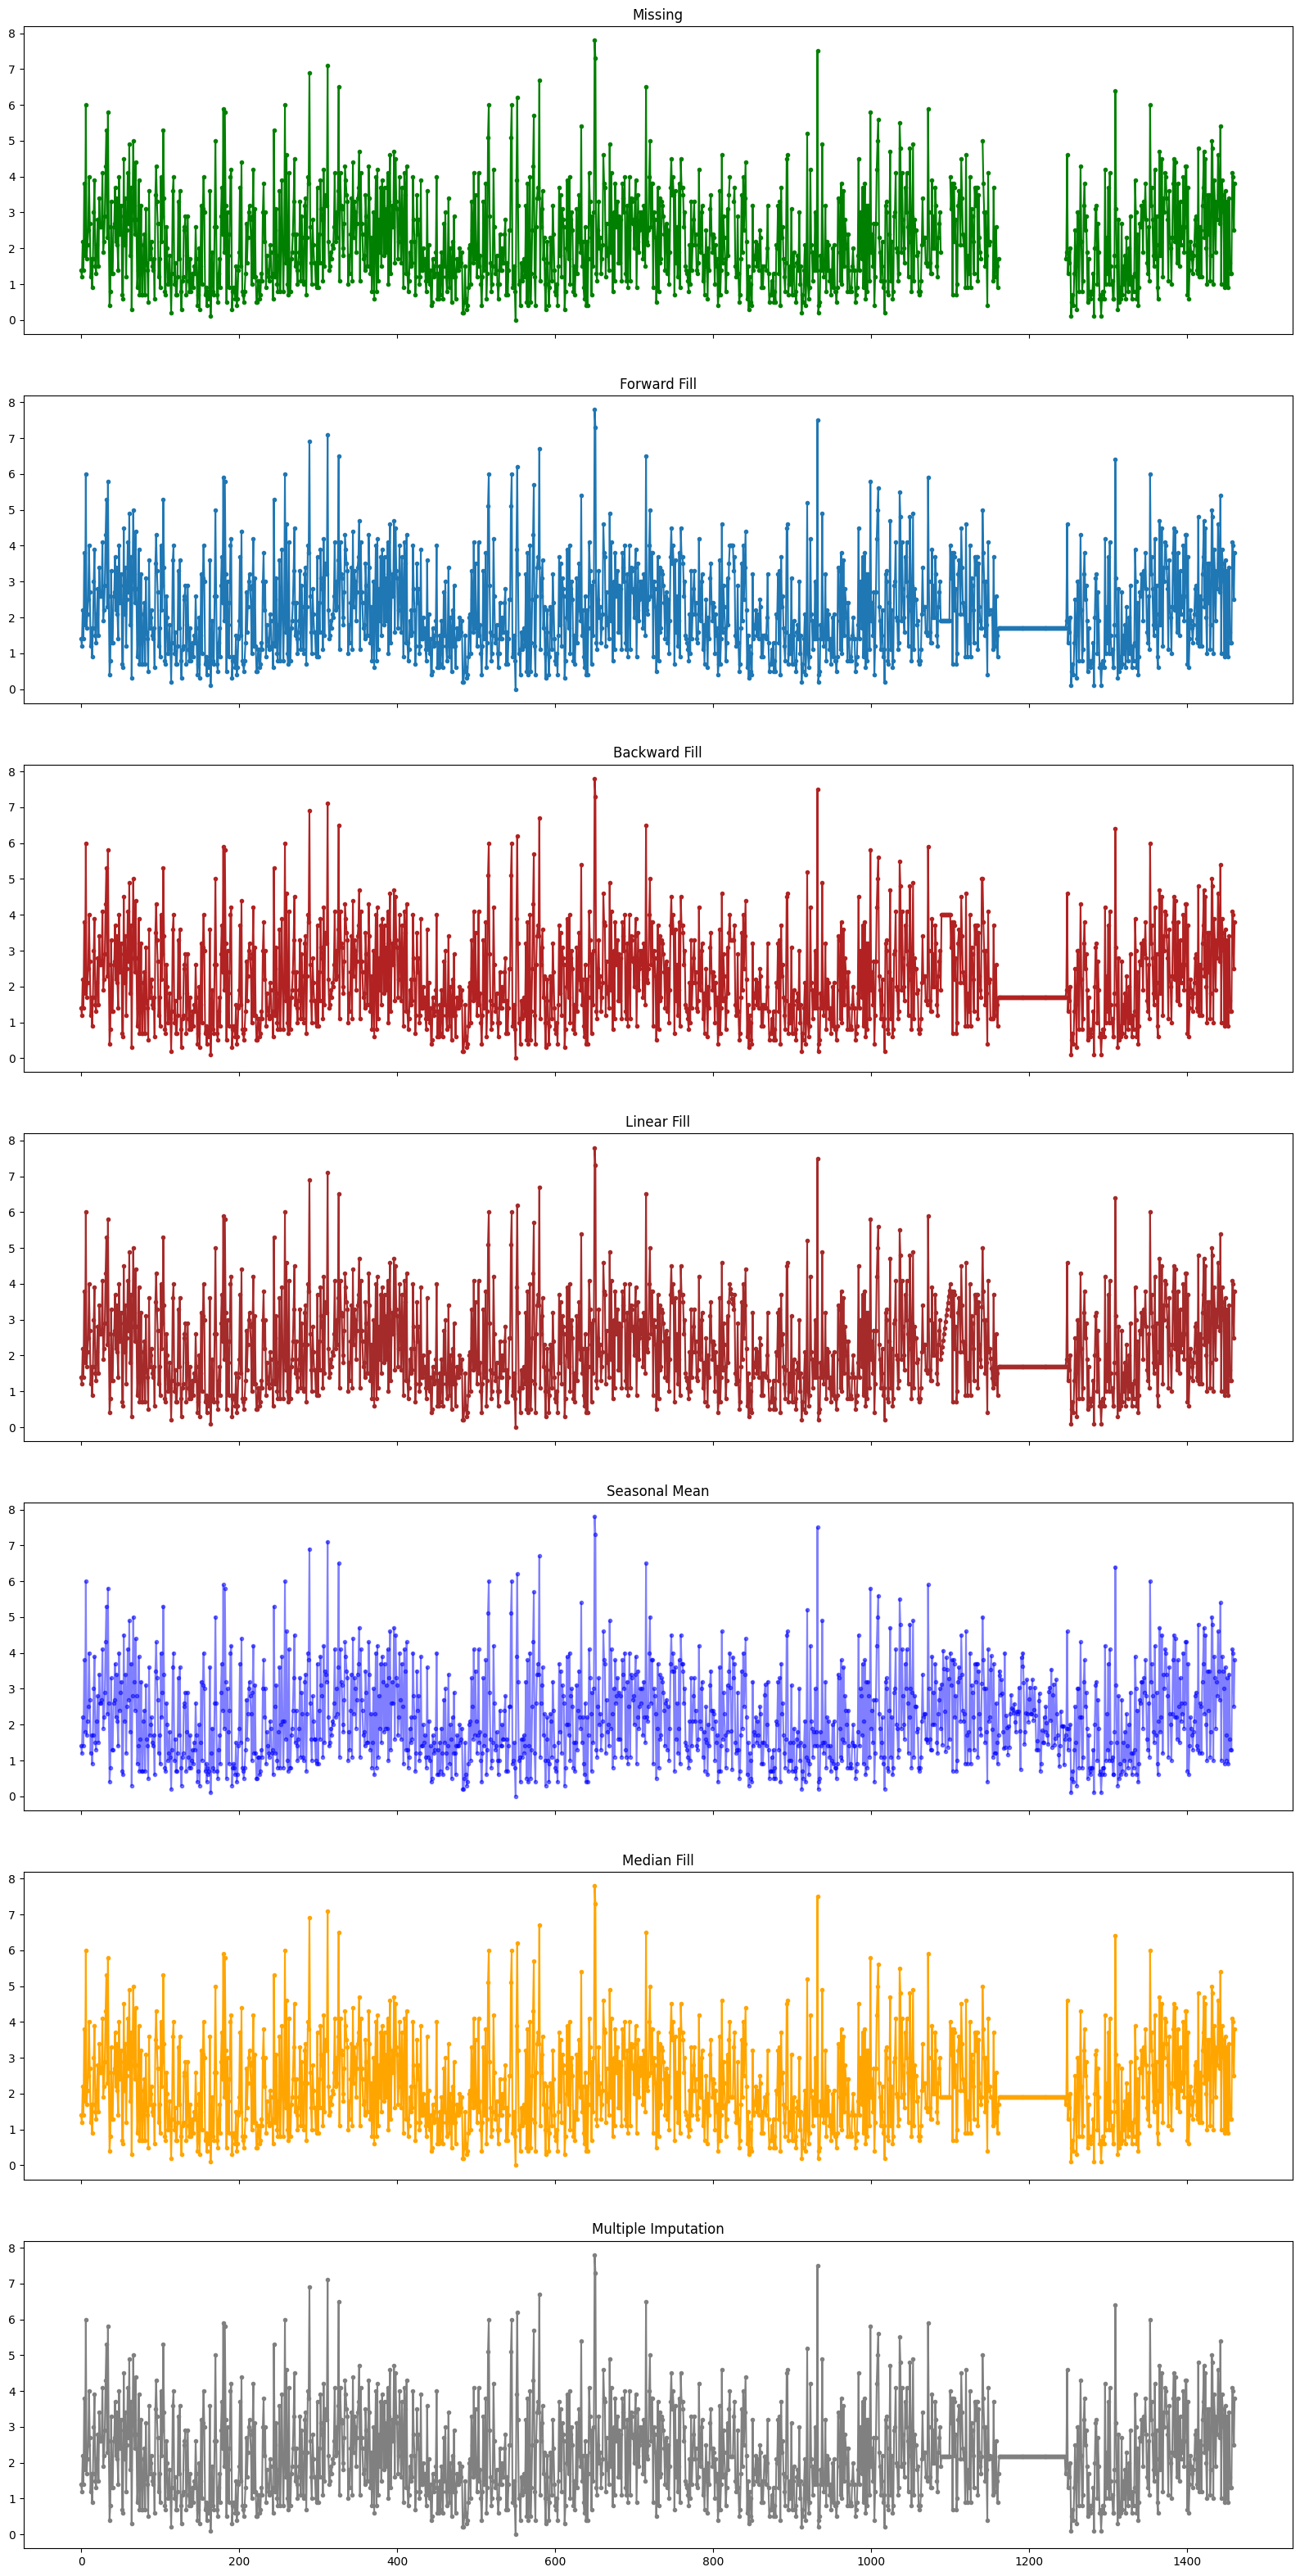

In [15]:
fig, axes = plt.subplots(7, 1, sharex=True, figsize=(20, 40))
plt.rcParams.update({'xtick.bottom' : False})

## 1. Missing -------------------------------
missing['WSpeed'].plot(title='Missing', ax=axes[0], label='Missing', color='green', style=".-")

## 2. Forward Fill --------------------------
df_ffill = missing.ffill()
df_ffill['WSpeed'].plot(title='Forward Fill', ax=axes[1], label='Forward Fill', style=".-")

## 3. Backward Fill -------------------------
df_bfill = missing.bfill()
df_bfill['WSpeed'].plot(title="Backward Fill", ax=axes[2], label='Back Fill', color='firebrick', style=".-")

## 4. Linear Interpolation ------------------
missing['rownum'] = np.arange(missing.shape[0])
df_nona = missing.dropna(subset = ['WSpeed'])
f = interp1d(df_nona['rownum'], df_nona['WSpeed'])
missing['linear_fill'] = f(missing['rownum'])
missing['linear_fill'].plot(title="Linear Fill", ax=axes[3], label='Linear Fill', color='brown', style=".-")

## 5. Seasonal Mean ----------------------------
def seasonal_mean(ts, n, lr=0.7):
    """
    Compute the mean of corresponding seasonal periods
    ts: 1D array-like of the time series
    n: Seasonal window length of the time series
    """
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            ts_seas = ts[i-1::-n]  # previous seasons only
            if np.isnan(np.nanmean(ts_seas)):
                ts_seas = np.concatenate([ts[i-1::-n], ts[i::n]])  # previous and forward
            out[i] = np.nanmean(ts_seas) * lr
    return out

missing['seasonal_mean'] = seasonal_mean(missing.WSpeed, n=365, lr=1.25)
missing['seasonal_mean'].plot(title="Seasonal Mean", ax=axes[4], label='Seasonal Mean', color='blue', alpha=0.5, style=".-")

## 6. Median ----------------------------
missing['median_fill'] = missing['WSpeed'].fillna(missing['WSpeed'].median())
missing['median_fill'].plot(title='Median Fill', ax=axes[5], label='Median Fill', color='orange', style='.-')

## 7. Multiple Imputer
imputer = IterativeImputer(max_iter=10, random_state=0)
missing_values = missing['WSpeed'].values.reshape(-1, 1)
missing['multiple_impute'] = imputer.fit_transform(missing_values)
missing['multiple_impute'] = missing['multiple_impute'].ravel()
missing['multiple_impute'].plot(title='Multiple Imputation', ax=axes[6], label='Multiple Imputation', color='grey', style='.-')

Seasonal features

In [16]:
missing = air_df01[['Date', 'Daily Average NO2 (ug/m3)']]
# missing = missing[(missing['Date'] >= '2022-01-01') & (missing['Date'] <= '2022-12-31')]
missing.rename(columns={'Daily Average NO2 (ug/m3)': 'NO2'}, inplace=True)
missing

C:\Users\Alvin Zhao\AppData\Local\Temp\ipykernel_11468\1552770383.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing.rename(columns={'Daily Average NO2 (ug/m3)': 'NO2'}, inplace=True)


Date        NO2
0    2020-01-01  21.876212
1    2020-01-02  16.849493
2    2020-01-03  19.870507
3    2020-01-04  11.675290
4    2020-01-05  13.878913
...         ...        ...
1456 2023-12-27  13.726013
1457 2023-12-28   9.393434
1458 2023-12-29  14.168251
1459 2023-12-30  11.949965
1460 2023-12-31   5.089541

[1461 rows x 2 columns]

C:\Users\Alvin Zhao\AppData\Local\Temp\ipykernel_11468\4281769485.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing['rownum'] = np.arange(missing.shape[0])
C:\Users\Alvin Zhao\AppData\Local\Temp\ipykernel_11468\4281769485.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing['linear_fill'] = f(missing['rownum'])
C:\Users\Alvin Zhao\AppData\Local\Temp\ipykernel_11468\4281769485.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

<Axes: title={'center': 'Multiple Imputation'}>

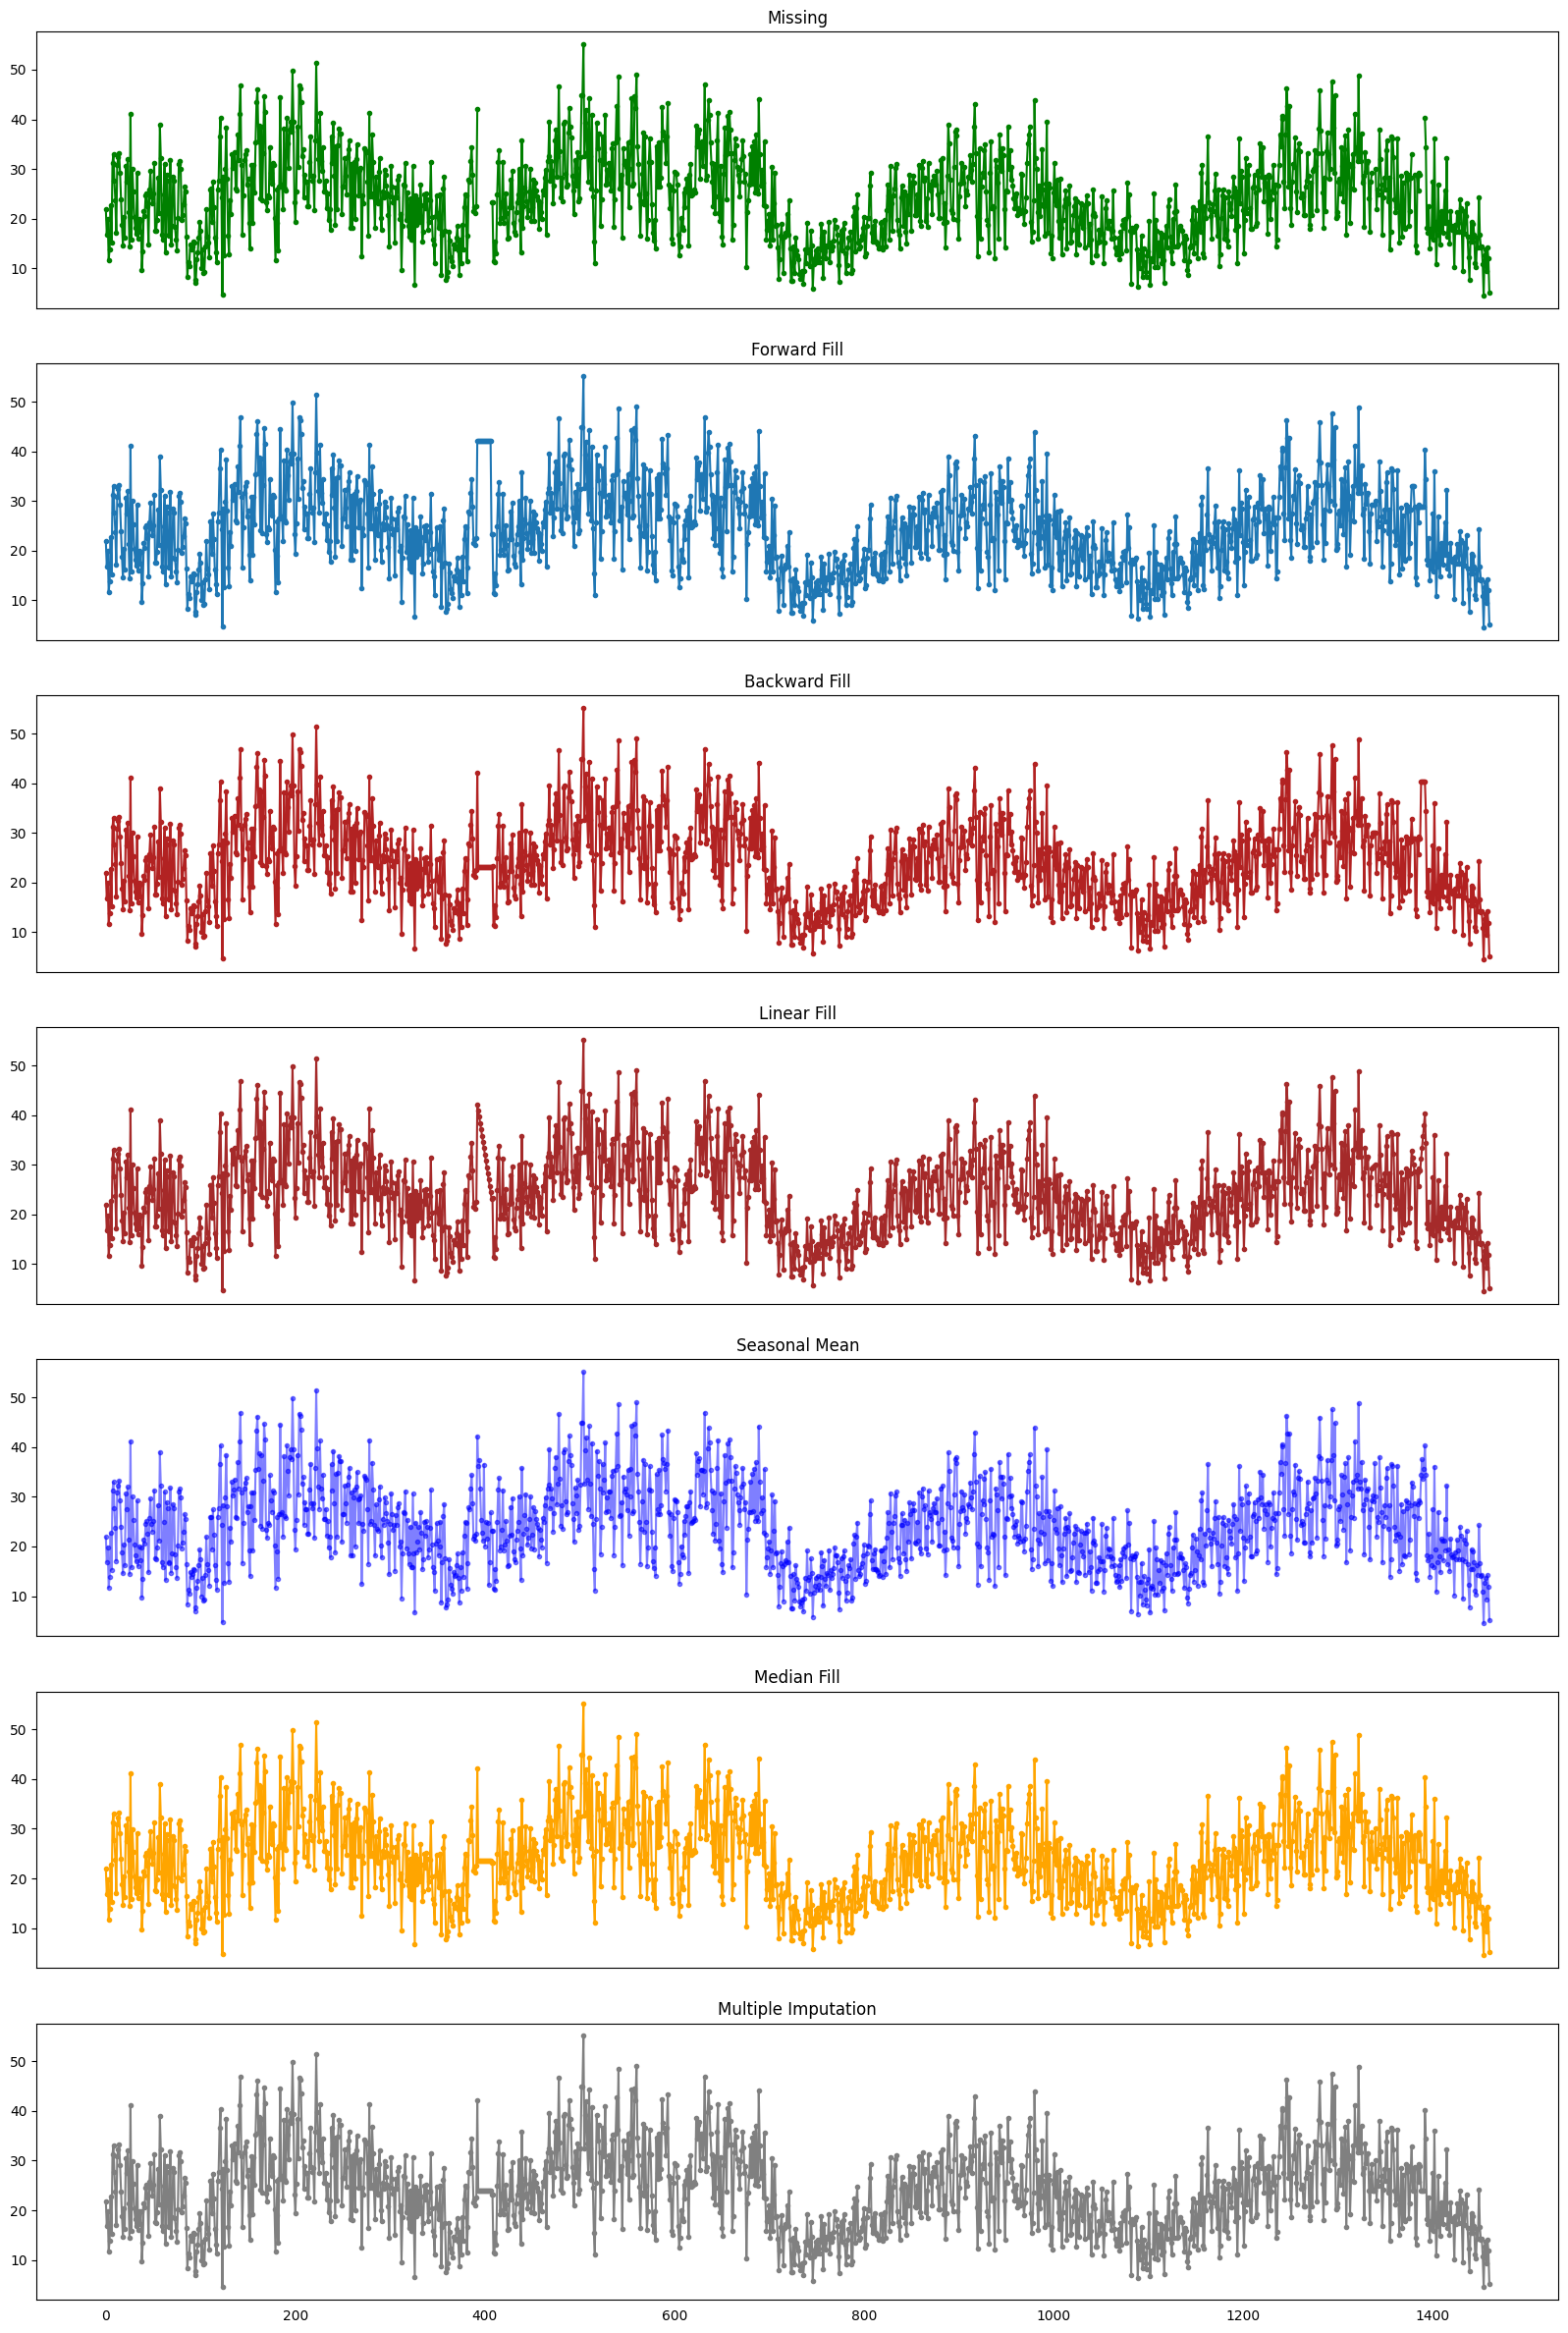

In [17]:
fig, axes = plt.subplots(7, 1, sharex=True, figsize=(20, 30))
plt.rcParams.update({'xtick.bottom' : False})

## 1. Missing -------------------------------
missing['NO2'].plot(title='Missing', ax=axes[0], label='Missing', color='green', style=".-")

## 2. Forward Fill --------------------------
df_ffill = missing.ffill()
df_ffill['NO2'].plot(title='Forward Fill', ax=axes[1], label='Forward Fill', style=".-")

## 3. Backward Fill -------------------------
df_bfill = missing.bfill()
df_bfill['NO2'].plot(title="Backward Fill", ax=axes[2], label='Back Fill', color='firebrick', style=".-")

## 4. Linear Interpolation ------------------
missing['rownum'] = np.arange(missing.shape[0])
df_nona = missing.dropna(subset = ['NO2'])
f = interp1d(df_nona['rownum'], df_nona['NO2'])
missing['linear_fill'] = f(missing['rownum'])
missing['linear_fill'].plot(title="Linear Fill", ax=axes[3], label='Linear Fill', color='brown', style=".-")

## 5. Seasonal Mean ----------------------------
def seasonal_mean(ts, n, lr=0.7):
    """
    Compute the mean of corresponding seasonal periods
    ts: 1D array-like of the time series
    n: Seasonal window length of the time series
    """
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            ts_seas = ts[i-1::-n]  # previous seasons only
            if np.isnan(np.nanmean(ts_seas)):
                ts_seas = np.concatenate([ts[i-1::-n], ts[i::n]])  # previous and forward
            out[i] = np.nanmean(ts_seas) * lr
    return out

missing['seasonal_mean'] = seasonal_mean(missing.NO2, n=365, lr=1.25)
missing['seasonal_mean'].plot(title="Seasonal Mean", ax=axes[4], label='Seasonal Mean', color='blue', alpha=0.5, style=".-")

## 6. Median ----------------------------
missing['median_fill'] = missing['NO2'].fillna(missing['NO2'].median())
missing['median_fill'].plot(title='Median Fill', ax=axes[5], label='Median Fill', color='orange', style='.-')

## 7. Multiple Imputer
imputer = IterativeImputer(max_iter=10, random_state=0)
missing_values = missing['NO2'].values.reshape(-1, 1)
missing['multiple_impute'] = imputer.fit_transform(missing_values)
missing['multiple_impute'] = missing['multiple_impute'].ravel()
missing['multiple_impute'].plot(title='Multiple Imputation', ax=axes[6], label='Multiple Imputation', color='grey', style='.-')

In [18]:
def seasonal_mean(ts, n, lr=0.7):
    """
    Compute the mean of corresponding seasonal periods
    ts: 1D array-like of the time series
    n: Seasonal window length of the time series
    """
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            ts_seas = ts[i-1::-n]  # previous seasons only
            if np.isnan(np.nanmean(ts_seas)):
                ts_seas = np.concatenate([ts[i-1::-n], ts[i::n]])  # previous and forward
            out[i] = np.nanmean(ts_seas) * lr
    return out

df_numeric = air_df01.select_dtypes(include=[np.number])
df_filled_numeric = df_numeric.apply(lambda col: seasonal_mean(col, n=365, lr=1))
air_df04 = air_df01.copy()
air_df04[df_numeric.columns] = df_filled_numeric

C:\Users\Alvin Zhao\AppData\Local\Temp\ipykernel_11468\4264940707.py:11: RuntimeWarning: Mean of empty slice
  if np.isnan(np.nanmean(ts_seas)):
C:\Users\Alvin Zhao\AppData\Local\Temp\ipykernel_11468\4264940707.py:13: RuntimeWarning: Mean of empty slice
  out[i] = np.nanmean(ts_seas) * lr


In [19]:
air_df04.drop(['Tgmin(C)', 'ET05(C)', 'ET10(C)', 'ET20(C)', 'ET30(C)', 'ET100(C)', 'Sun(Hrs)'], axis=1, inplace=True) # drop 'ET05(C) and 'ET30(C) without any values
missing_values = air_df04.isna().sum()
print(missing_values)

Date                           0
Daily Average CO (mg/m3)       0
Daily Average NO (ug/m3)       0
Daily Average NO2 (ug/m3)      0
Daily Average SO2 (ug/m3)      0
Daily Average PM2.5 (ug/m3)    0
Daily Average PM10 (ug/m3)     0
WDir(Deg)                      0
WSpd(m/s)                      0
GustDir(Deg)                   0
GustSpd(m/s)                   0
WindRun(Km)                    0
Rain(mm)                       0
Tdry(C)                        0
TWet(C)                        0
RH(%)                          0
Tmax(C)                        0
Tmin(C)                        0
Pmsl(hPa)                      0
Pstn(hPa)                      0
Rad(MJ/m2)                     0
lightCount                     0
heavyCount                     0
Year                           0
Month                          0
Day of Week                    0
Is Weekday                     0
T(C)                           0
trafficCount                   0
dtype: int64


### Conver the categorical variables into numeric

In [20]:
no_num_cols = air_df04.select_dtypes(exclude=['number']).columns
no_num_cols = list(no_num_cols)
no_num_cols.remove('Date')
print(no_num_cols)

['Month', 'Day of Week', 'Is Weekday']


In [21]:
label_encoder = LabelEncoder()

for column in no_num_cols:
    air_df04[column] = label_encoder.fit_transform(air_df04[column])

air_df04

Date  Daily Average CO (mg/m3)  Daily Average NO (ug/m3)  \
0    2020-01-01                  0.245330                 30.019470   
1    2020-01-02                  0.274290                 26.078985   
2    2020-01-03                  0.255413                 31.498913   
3    2020-01-04                  0.100029                 12.947029   
4    2020-01-05                  0.154580                 16.044275   
...         ...                       ...                       ...   
1456 2023-12-27                  0.295114                 24.239344   
1457 2023-12-28                  0.261138                 18.045330   
1458 2023-12-29                  0.314789                 17.724737   
1459 2023-12-30                  0.278242                 12.919633   
1460 2023-12-31                  0.245410                  5.847671   

      Daily Average NO2 (ug/m3)  Daily Average SO2 (ug/m3)  \
0                     21.876212                   2.470833   
1                     16.849493                   2.604565   
2                     19.870507                   2.267464   
3                     11.675290                   1.918478   
4                     13.878913                   2.063841   
...                         ...                        ...   
1456                  13.726013                   0.992174   
1457                   9.393434                   1.345362   
1458                  14.168251                   1.684058   
1459                  11.949965                   1.761087   
1460                   5.089541                   1.415942   

      Daily Average PM2.5 (ug/m3)  Daily Average PM10 (ug/m3)  WDir(Deg)  \
0                        9.482609                   25.756522       35.0   
1                       15.187500                   24.491667      308.0   
2                        6.595833                   14.275000      207.0   
3                        3.162500                   12.262500      231.0   
4                        6.254167                   22.204167       59.0   
...                           ...                         ...        ...   
1456                     2.175879                    5.334532       19.0   
1457                     3.944295                    8.552974       49.0   
1458                     7.550594                   16.320599       67.0   
1459                     1.884365                    6.143038      214.0   
1460                     3.377318                    9.244344      356.0   

      WSpd(m/s)  GustDir(Deg)  ...  Pstn(hPa)  Rad(MJ/m2)   lightCount  \
0           1.4         191.0  ...     1009.8       13.61  4695.569343   
1           1.2         202.0  ...     1009.4       23.02  5257.500000   
2           2.2          32.0  ...     1003.0        7.42  4770.377698   
3           1.4         202.0  ...     1006.0       28.06  4637.741007   
4           3.8         279.0  ...     1001.0       19.62  5728.804965   
...         ...           ...  ...        ...         ...          ...   
1456        1.3          85.0  ...     1023.9       15.94  5450.485507   
1457        4.1          42.0  ...     1021.2       15.70  5178.557971   
1458        4.0          72.0  ...     1000.4       23.45  5362.992754   
1459        2.5         304.0  ...      998.5       33.45  5080.601449   
1460        3.8         265.0  ...      995.0       32.84  4245.108696   

      heavyCount  Year  Month  Day of Week  Is Weekday   T(C)  trafficCount  
0     241.747967  2020      4            6           1  22.65   4937.317311  
1     387.573171  2020      4            4           1  18.40   5645.073171  
2     280.247967  2020      4            0           1  16.60   5050.625665  
3     236.650407  2020      4            2           0  14.15   4874.391414  
4     492.516000  2020      4            3           0  18.80   6221.320965  
...          ...   ...    ...          ...         ...    ...           ...  
1456  445.268116  2023      2            6           1  14.20   5

In [22]:
print(air_df01['Year'].value_counts())
print(air_df04['Year'].value_counts())

Year
2020    366
2021    365
2022    365
2023    365
Name: count, dtype: int64
Year
2020    366
2021    365
2022    365
2023    365
Name: count, dtype: int64


In [23]:
print(air_df01['Month'].value_counts())
print(air_df04['Month'].value_counts())

Month
Jan    124
Mar    124
May    124
Jul    124
Aug    124
Oct    124
Dec    124
Apr    120
Jun    120
Sep    120
Nov    120
Feb    113
Name: count, dtype: int64
Month
4     124
7     124
8     124
5     124
1     124
10    124
2     124
0     120
6     120
11    120
9     120
3     113
Name: count, dtype: int64


In [24]:
print(air_df01['Day of Week'].value_counts())
print(air_df04['Day of Week'].value_counts())

Day of Week
Wed    209
Thu    209
Fri    209
Sat    209
Sun    209
Mon    208
Tue    208
Name: count, dtype: int64
Day of Week
6    209
4    209
0    209
2    209
3    209
1    208
5    208
Name: count, dtype: int64


In [25]:
print(air_df01['Is Weekday'].value_counts())
print(air_df04['Is Weekday'].value_counts())

Is Weekday
True     1043
False     418
Name: count, dtype: int64
Is Weekday
1    1043
0     418
Name: count, dtype: int64


### Outliers

In [26]:
# Define a function to detect outliers using IQR
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)

outliers = air_df04.select_dtypes(exclude='object').apply(detect_outliers)
outliers

Date  Daily Average CO (mg/m3)  Daily Average NO (ug/m3)  \
0     False                     False                     False   
1     False                     False                     False   
2     False                     False                     False   
3     False                     False                     False   
4     False                     False                     False   
...     ...                       ...                       ...   
1456  False                     False                     False   
1457  False                     False                     False   
1458  False                     False                     False   
1459  False                     False                     False   
1460  False                     False                     False   

      Daily Average NO2 (ug/m3)  Daily Average SO2 (ug/m3)  \
0                         False                      False   
1                         False                      False   
2                         False                      False   
3                         False                      False   
4                         False                      False   
...                         ...                        ...   
1456                      False                      False   
1457                      False                      False   
1458                      False                      False   
1459                      False                      False   
1460                      False                      False   

      Daily Average PM2.5 (ug/m3)  Daily Average PM10 (ug/m3)  WDir(Deg)  \
0                           False                       False      False   
1                            True                       False      False   
2                           False                       False      False   
3                           False                       False      False   
4                           False                       False      False   
...                           ...                         ...        ...   
1456                        False                       False      False   
1457                        False                       False      False   
1458                        False                       False      False   
1459                        False                       False      False   
1460                        False                       False      False   

      WSpd(m/s)  GustDir(Deg)  ...  Pstn(hPa)  Rad(MJ/m2)  lightCount  \
0         False         False  ...      False       False       False   
1         False         False  ...      False       False       False   
2         False         False  ...      False       False       False   
3         False         False  ...      False       False       False   
4         False         False  ...      False       False       False   
...         ...           ...  ...        ...         ...         ...   
1456      False         False  ...      False       False       False   
1457      False         False  ...      False       False       False   
1458      False         False  ...      False       False       False   
1459      False         False  ...      False       False       False   
1460      False         False  ...      False       False       False   

      heavyCount   Year  Month  Day of Week  Is Weekday   T(C)  trafficCount  
0          False  False  False        False       False  False         False  
1          False  False  False        False       False  False         False  
2          False  False  False        False       False  False         False  
3          False  False  False        False       False  False         False  
4          False  False  False        False       False  False         False  
...          ...    ...    ...          ...         ...    ...           ...  
1456       False  False  False        False       False  False         False  
1457       False  False  False     

In [27]:
# change outliers as median
for column in air_df04.select_dtypes(exclude='object').columns:
    median_value = air_df04[column].median()
    outliers_column = outliers[column]
    air_df04.loc[outliers_column, column] = median_value

air_df04

Date  Daily Average CO (mg/m3)  Daily Average NO (ug/m3)  \
0    2020-01-01                  0.245330                 30.019470   
1    2020-01-02                  0.274290                 26.078985   
2    2020-01-03                  0.255413                 31.498913   
3    2020-01-04                  0.100029                 12.947029   
4    2020-01-05                  0.154580                 16.044275   
...         ...                       ...                       ...   
1456 2023-12-27                  0.295114                 24.239344   
1457 2023-12-28                  0.261138                 18.045330   
1458 2023-12-29                  0.314789                 17.724737   
1459 2023-12-30                  0.278242                 12.919633   
1460 2023-12-31                  0.245410                  5.847671   

      Daily Average NO2 (ug/m3)  Daily Average SO2 (ug/m3)  \
0                     21.876212                   2.470833   
1                     16.849493                   2.604565   
2                     19.870507                   2.267464   
3                     11.675290                   1.918478   
4                     13.878913                   2.063841   
...                         ...                        ...   
1456                  13.726013                   0.992174   
1457                   9.393434                   1.345362   
1458                  14.168251                   1.684058   
1459                  11.949965                   1.761087   
1460                   5.089541                   1.415942   

      Daily Average PM2.5 (ug/m3)  Daily Average PM10 (ug/m3)  WDir(Deg)  \
0                        9.482609                   25.756522       35.0   
1                        4.829167                   24.491667      308.0   
2                        6.595833                   14.275000      207.0   
3                        3.162500                   12.262500      231.0   
4                        6.254167                   22.204167       59.0   
...                           ...                         ...        ...   
1456                     2.175879                    5.334532       19.0   
1457                     3.944295                    8.552974       49.0   
1458                     7.550594                   16.320599       67.0   
1459                     1.884365                    6.143038      214.0   
1460                     3.377318                    9.244344      356.0   

      WSpd(m/s)  GustDir(Deg)  ...  Pstn(hPa)  Rad(MJ/m2)   lightCount  \
0           1.4         191.0  ...     1009.8       13.61  4695.569343   
1           1.2         202.0  ...     1009.4       23.02  5257.500000   
2           2.2          32.0  ...     1003.0        7.42  4770.377698   
3           1.4         202.0  ...     1006.0       28.06  4637.741007   
4           3.8         279.0  ...     1001.0       19.62  5728.804965   
...         ...           ...  ...        ...         ...          ...   
1456        1.3          85.0  ...     1023.9       15.94  5450.485507   
1457        4.1          42.0  ...     1021.2       15.70  5178.557971   
1458        4.0          72.0  ...     1000.4       23.45  5362.992754   
1459        2.5         304.0  ...      998.5       33.45  5080.601449   
1460        3.8         265.0  ...      995.0       32.84  4245.108696   

      heavyCount  Year  Month  Day of Week  Is Weekday   T(C)  trafficCount  
0     241.747967  2020      4            6           1  22.65   4937.317311  
1     387.573171  2020      4            4           1  18.40   5645.073171  
2     280.247967  2020      4            0           1  16.60   5050.625665  
3     236.650407  2020      4            2           0  14.15   4874.391414  
4     492.516000  2020      4            3           0  18.80   6221.320965  
...          ...   ...    ...          ...         ...    ...           ...  
1456  445.268116  2023      2            6           1  14.20   5

In [28]:
print(air_df04.columns)

Index(['Date', 'Daily Average CO (mg/m3)', 'Daily Average NO (ug/m3)',
       'Daily Average NO2 (ug/m3)', 'Daily Average SO2 (ug/m3)',
       'Daily Average PM2.5 (ug/m3)', 'Daily Average PM10 (ug/m3)',
       'WDir(Deg)', 'WSpd(m/s)', 'GustDir(Deg)', 'GustSpd(m/s)', 'WindRun(Km)',
       'Rain(mm)', 'Tdry(C)', 'TWet(C)', 'RH(%)', 'Tmax(C)', 'Tmin(C)',
       'Pmsl(hPa)', 'Pstn(hPa)', 'Rad(MJ/m2)', 'lightCount', 'heavyCount',
       'Year', 'Month', 'Day of Week', 'Is Weekday', 'T(C)', 'trafficCount'],
      dtype='object')


### Data scaling

In [29]:
columns_to_scale = ['Daily Average NO2 (ug/m3)', 'Daily Average NO (ug/m3)', 
                    'Daily Average CO (mg/m3)', 'Daily Average SO2 (ug/m3)', 'Daily Average PM2.5 (ug/m3)', 'Daily Average PM10 (ug/m3)',
                    'WDir(Deg)', 'WSpd(m/s)', 'GustDir(Deg)', 'GustSpd(m/s)', 'WindRun(Km)', 
                    'Rain(mm)', 'Tdry(C)', 'TWet(C)', 'RH(%)', 'Tmax(C)', 'Tmin(C)', 
                    'Pmsl(hPa)', 'Pstn(hPa)', 'Rad(MJ/m2)', 'lightCount', 'heavyCount', 'Year', 'Month',
                    'Day of Week', 'Is Weekday', 'T(C)', 'trafficCount']

# use Min-Max Scaler
scaler = MinMaxScaler()
air_df05 = air_df04.copy()
air_df05[columns_to_scale] = scaler.fit_transform(air_df05[columns_to_scale])
air_df05

Date  Daily Average CO (mg/m3)  Daily Average NO (ug/m3)  \
0    2020-01-01                  0.428457                  0.373733   
1    2020-01-02                  0.487897                  0.318845   
2    2020-01-03                  0.449153                  0.394341   
3    2020-01-04                  0.130234                  0.135925   
4    2020-01-05                  0.242197                  0.179068   
...         ...                       ...                       ...   
1456 2023-12-27                  0.530638                  0.293220   
1457 2023-12-28                  0.460904                  0.206941   
1458 2023-12-29                  0.571021                  0.202476   
1459 2023-12-30                  0.496009                  0.135544   
1460 2023-12-31                  0.428623                  0.037036   

      Daily Average NO2 (ug/m3)  Daily Average SO2 (ug/m3)  \
0                      0.403735                   0.644975   
1                      0.286994                   0.681002   
2                      0.357154                   0.590189   
3                      0.166828                   0.496174   
4                      0.218005                   0.535334   
...                         ...                        ...   
1456                   0.214454                   0.246633   
1457                   0.113834                   0.341780   
1458                   0.224725                   0.433022   
1459                   0.173207                   0.453773   
1460                   0.013881                   0.360793   

      Daily Average PM2.5 (ug/m3)  Daily Average PM10 (ug/m3)  WDir(Deg)  \
0                        0.729874                    0.760538   0.097222   
1                        0.371227                    0.721364   0.855556   
2                        0.507386                    0.404945   0.575000   
3                        0.242775                    0.342616   0.641667   
4                        0.481053                    0.650518   0.163889   
...                           ...                         ...        ...   
1456                     0.166734                    0.128050   0.052778   
1457                     0.303029                    0.227728   0.136111   
1458                     0.580971                    0.468299   0.186111   
1459                     0.144267                    0.153090   0.594444   
1460                     0.259331                    0.249141   0.988889   

      WSpd(m/s)  GustDir(Deg)  ...  Pstn(hPa)  Rad(MJ/m2)  lightCount  \
0      0.245614      0.529248  ...   0.441406    0.395653    0.339804   
1      0.210526      0.559889  ...   0.433594    0.675796    0.466235   
2      0.385965      0.086351  ...   0.308594    0.211372    0.356636   
3      0.245614      0.559889  ...   0.367188    0.825841    0.326793   
4      0.666667      0.774373  ...   0.269531    0.574576    0.572275   
...         ...           ...  ...        ...         ...         ...   
1456   0.228070      0.233983  ...   0.716797    0.465019    0.509655   
1457   0.719298      0.114206  ...   0.664062    0.457874    0.448473   
1458   0.701754      0.197772  ...   0.257812    0.688598    0.489970   
1459   0.438596      0.844011  ...   0.220703    0.986305    0.426434   
1460   0.666667      0.735376  ...   0.152344    0.968145    0.238454   

      heavyCount  Year     Month  Day of Week  Is Weekday      T(C)  \
0       0.277994   0.0  0.363636     1.000000         1.0  0.840000   
1       0.515516   0.0  0.363636     0.666667         1.0  0.661053   
2       0.340703   0.0  0.363636     0.000000         1.0  0.585263   
3       0.269691   0.0  0.363636     0.333333         0.0  0.482105   
4       0.686448   0.0  0.363636     0.500000         0.0  0.677895   
...          ...   ...       ...          ...         ...       ...   
1456    0.609490   1.0  0.181818     1.000000         1.0  0.484211   
1457    0.598348   1.0  0.181818     0.666667         1

## Exploratory data analysis

### PM2.5

In [30]:
# Daily average value time-trend
fig = make_subplots(rows=5, cols=1, subplot_titles=['Daily Average PM2.5 for All Years'] + [f'Daily Average PM2.5 for {year}' for year in years])

fig.add_trace(
    go.Scatter(x=air_df01['Date'], y=air_df01['Daily Average PM2.5 (ug/m3)'], mode='lines', name='All Years'),
    row=1, col=1
)

for i, year in enumerate(years):
    yearly_data = air_df01[air_df01['Year'] == year]

    fig.add_trace(
        go.Scatter(x=yearly_data['Date'], y=yearly_data['Daily Average PM2.5 (ug/m3)'], mode='lines', name=f'{year}'),
        row=i+2, col=1  
    )

fig.update_layout(height=1500, width=1000, title_text="Daily Average PM2.5 in Christchurch by Year")
fig.update_xaxes(title_text="Year - Month")
fig.update_yaxes(title_text="PM2.5 (ug/m3)")

fig.show()

In [31]:
# Monthly average value time-trend
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']

fig = go.Figure()

for i, year_to_plot in enumerate(years):
    data = air_df02[air_df02['Year'] == year_to_plot]

    fig.add_trace(go.Scatter(
        x=data['Month'], 
        y=data['Daily Average PM2.5 (ug/m3)'], 
        mode='lines+markers',
        name=str(year_to_plot),
        marker=dict(color=colors[i % len(colors)])
    ))

    if not data.empty:
        fig.add_trace(go.Scatter(
            x=[data['Month'].iloc[-1]], 
            y=[data['Daily Average PM2.5 (ug/m3)'].iloc[-1]], 
            text=[str(year_to_plot)],
            mode='text',
            showlegend=False
        ))

fig.update_layout(
    title='Monthly Average PM2.5 in Christchurch',
    xaxis_title='Month',
    yaxis_title='PM2.5 (ug/m3)',
    height=500,
    width=1000
)

fig.show()

# Weekly average value time-trend
fig2 = go.Figure()

for i, year_to_plot in enumerate(years):
    data = air_df03[air_df03['Year'] == year_to_plot]

    fig2.add_trace(go.Scatter(
        x=data['Day of Week'], 
        y=data['Daily Average PM2.5 (ug/m3)'], 
        mode='lines+markers',
        name=str(year_to_plot),
        marker=dict(color=colors[i % len(colors)])
    ))

    if not data.empty:
        fig.add_trace(go.Scatter(
            x=[data['Day of Week'].iloc[-1]], 
            y=[data['Daily Average PM2.5 (ug/m3)'].iloc[-1]], 
            text=[str(year_to_plot)],
            mode='text',
            showlegend=False
        ))

fig2.update_layout(
    title='Day of Week Average PM2.5 in Christchurch',
    xaxis_title='Day of Week',
    yaxis_title='PM2.5 (ug/m3)',
    height=500,
    width=1000
)

fig2.show()

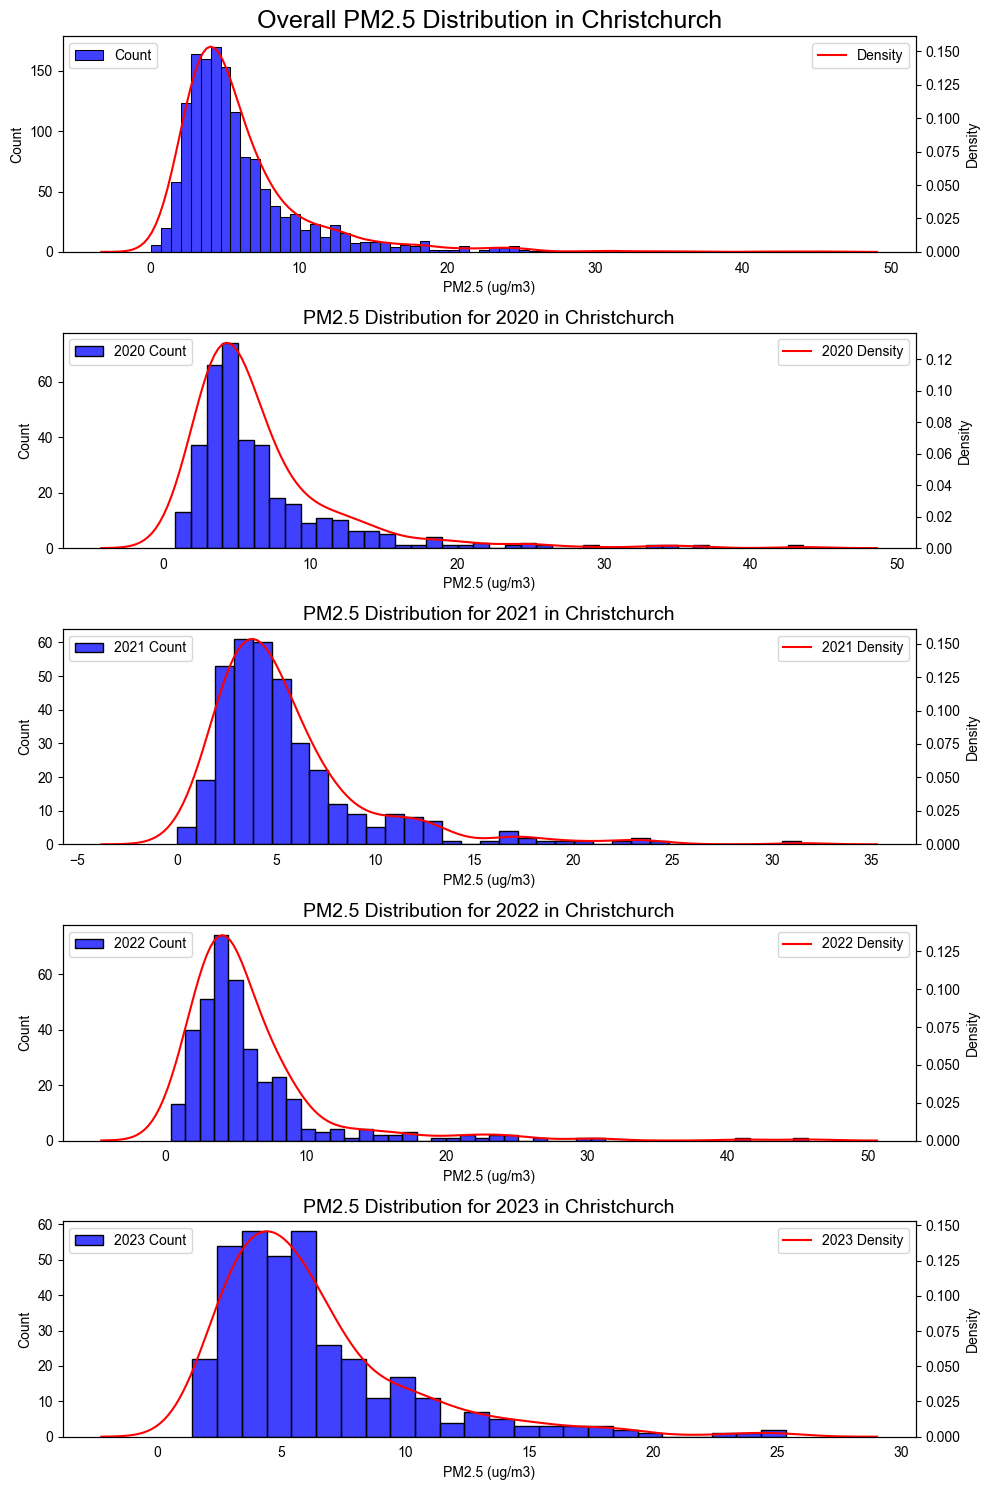

In [32]:
# Box-plot distribution
fig = make_subplots(rows=1, cols=3, subplot_titles=('Year-Wise Distribution', 
                                                    'Month-Wise Distribution', 
                                                    'Overall Distribution'))

fig.add_trace(
    go.Box(x=air_df01['Year'], y=air_df01['Daily Average PM2.5 (ug/m3)'], name='Year-Wise'),
    row=1, col=1
)

fig.add_trace(
    go.Box(x=air_df01['Month'], y=air_df01['Daily Average PM2.5 (ug/m3)'], name='Month-Wise'),
    row=1, col=2
)

fig.add_trace(
    go.Box(y=air_df01['Daily Average PM2.5 (ug/m3)'], name='Overall'),
    row=1, col=3
)

fig.update_layout(height=500, width=1000, 
                  title_text="PM2.5 Distribution in Christchurch",
                  yaxis1=dict(title='PM2.5 (ug/m3)'))

fig.show()

# Histogram distribution
fig, axs = plt.subplots(5, 1, figsize=(10, 15))

sns.histplot(x=air_df01['Daily Average PM2.5 (ug/m3)'], ax=axs[0], label="Count", color='blue')
ax2 = axs[0].twinx()
sns.kdeplot(x=air_df01['Daily Average PM2.5 (ug/m3)'], ax=ax2, color="red", label="Density")
axs[0].set_title('Overall PM2.5 Distribution in Christchurch', fontsize=18)
axs[0].set_xlabel('PM2.5 (ug/m3)')
axs[0].legend(loc='upper left')
ax2.legend(loc='upper right')

for i, year in enumerate(years):
    ax = axs[i + 1]  
    ax2 = ax.twinx()

    yearly_data = air_df01[air_df01['Year'] == year]

    sns.histplot(x=yearly_data['Daily Average PM2.5 (ug/m3)'], ax=ax, label=f"{year} Count", color='blue')
    sns.kdeplot(x=yearly_data['Daily Average PM2.5 (ug/m3)'], ax=ax2, color="red", label=f"{year} Density")

    ax.set_title(f'PM2.5 Distribution for {year} in Christchurch', fontsize=14)
    ax.set_xlabel('PM2.5 (ug/m3)')
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

sns.set_style('darkgrid')
plt.tight_layout()
plt.show()

### PM10

In [33]:
# Daily average value time-trend
fig = make_subplots(rows=5, cols=1, subplot_titles=['Daily Average PM10 for All Years'] + [f'Daily Average PM10 for {year}' for year in years])

fig.add_trace(
    go.Scatter(x=air_df01['Date'], y=air_df01['Daily Average PM10 (ug/m3)'], mode='lines', name='All Years'),
    row=1, col=1
)

for i, year in enumerate(years):
    yearly_data = air_df01[air_df01['Year'] == year]

    fig.add_trace(
        go.Scatter(x=yearly_data['Date'], y=yearly_data['Daily Average PM10 (ug/m3)'], mode='lines', name=f'{year}'),
        row=i+2, col=1  
    )

fig.update_layout(height=1500, width=1000, title_text="Daily Average PM10 in Christchurch by Year")
fig.update_xaxes(title_text="Year - Month")
fig.update_yaxes(title_text="PM10 (ug/m3)")

fig.show()

In [34]:
# Monthly average value time-trend
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']

fig = go.Figure()

for i, year_to_plot in enumerate(years):
    data = air_df02[air_df02['Year'] == year_to_plot]

    fig.add_trace(go.Scatter(
        x=data['Month'], 
        y=data['Daily Average PM10 (ug/m3)'], 
        mode='lines+markers',
        name=str(year_to_plot),
        marker=dict(color=colors[i % len(colors)])
    ))

    if not data.empty:
        fig.add_trace(go.Scatter(
            x=[data['Month'].iloc[-1]], 
            y=[data['Daily Average PM10 (ug/m3)'].iloc[-1]], 
            text=[str(year_to_plot)],
            mode='text',
            showlegend=False
        ))

fig.update_layout(
    title='Monthly Average PM10 in Christchurch',
    xaxis_title='Month',
    yaxis_title='PM10 (ug/m3)',
    height=500,
    width=1000
)

fig.show()

#Weekly average value time-trend
fig2 = go.Figure()

for i, year_to_plot in enumerate(years):
    data = air_df03[air_df03['Year'] == year_to_plot]

    fig2.add_trace(go.Scatter(
        x=data['Day of Week'], 
        y=data['Daily Average PM10 (ug/m3)'], 
        mode='lines+markers',
        name=str(year_to_plot),
        marker=dict(color=colors[i % len(colors)])
    ))

    if not data.empty:
        fig2.add_trace(go.Scatter(
            x=[data['Day of Week'].iloc[-1]], 
            y=[data['Daily Average PM10 (ug/m3)'].iloc[-1]], 
            text=[str(year_to_plot)],
            mode='text',
            showlegend=False
        ))

fig2.update_layout(
    title='Day of Week Average PM10 in Christchurch',
    xaxis_title='Day of Week',
    yaxis_title='PM10 (ug/m3)',
    height=500,
    width=1000
)

fig2.show()

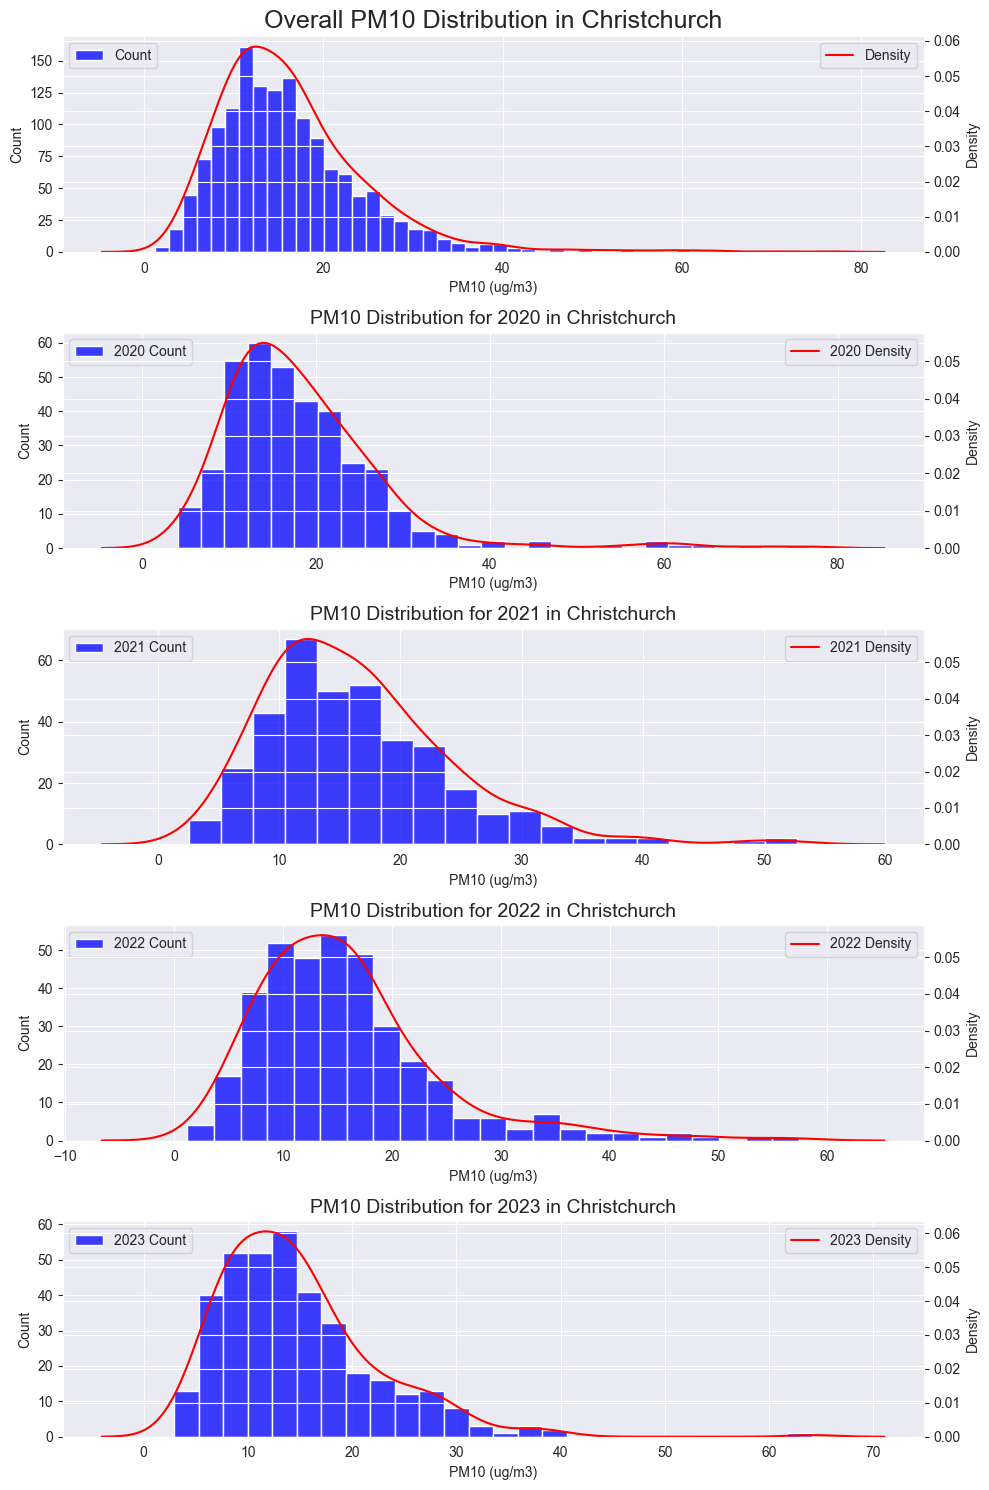

In [35]:
# Box-plot distribution
fig = make_subplots(rows=1, cols=3, subplot_titles=('Year-Wise Distribution', 
                                                    'Month-Wise Distribution', 
                                                    'Overall Distribution'))

fig.add_trace(
    go.Box(x=air_df01['Year'], y=air_df01['Daily Average PM10 (ug/m3)'], name='Year-Wise'),
    row=1, col=1
)

fig.add_trace(
    go.Box(x=air_df01['Month'], y=air_df01['Daily Average PM10 (ug/m3)'], name='Month-Wise'),
    row=1, col=2
)

fig.add_trace(
    go.Box(y=air_df01['Daily Average PM10 (ug/m3)'], name='Overall'),
    row=1, col=3
)

fig.update_layout(height=500, width=1000, 
                  title_text="PM10 Distribution in Christchurch",
                  yaxis1=dict(title='PM10 (ug/m3)'))

fig.show()

# Histogram distribution
fig, axs = plt.subplots(5, 1, figsize=(10, 15))

sns.histplot(x=air_df01['Daily Average PM10 (ug/m3)'], ax=axs[0], label="Count", color='blue')
ax2 = axs[0].twinx()
sns.kdeplot(x=air_df01['Daily Average PM10 (ug/m3)'], ax=ax2, color="red", label="Density")
axs[0].set_title('Overall PM10 Distribution in Christchurch', fontsize=18)
axs[0].set_xlabel('PM10 (ug/m3)')
axs[0].legend(loc='upper left')
ax2.legend(loc='upper right')

for i, year in enumerate(years):
    ax = axs[i + 1]  
    ax2 = ax.twinx()

    yearly_data = air_df01[air_df01['Year'] == year]

    sns.histplot(x=yearly_data['Daily Average PM10 (ug/m3)'], ax=ax, label=f"{year} Count", color='blue')
    sns.kdeplot(x=yearly_data['Daily Average PM10 (ug/m3)'], ax=ax2, color="red", label=f"{year} Density")

    ax.set_title(f'PM10 Distribution for {year} in Christchurch', fontsize=14)
    ax.set_xlabel('PM10 (ug/m3)')
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

sns.set_style('darkgrid')
plt.tight_layout()
plt.show()

### NO2

In [36]:
# Daily average value time-trend
fig = make_subplots(rows=5, cols=1, subplot_titles=['Daily Average NO2 for All Years'] + [f'Daily Average NO2 for {year}' for year in years])

fig.add_trace(
    go.Scatter(x=air_df01['Date'], y=air_df01['Daily Average NO2 (ug/m3)'], mode='lines', name='All Years'),
    row=1, col=1
)

for i, year in enumerate(years):
    yearly_data = air_df01[air_df01['Year'] == year]

    fig.add_trace(
        go.Scatter(x=yearly_data['Date'], y=yearly_data['Daily Average NO2 (ug/m3)'], mode='lines', name=f'{year}'),
        row=i+2, col=1  
    )

fig.update_layout(height=1500, width=1000, title_text="Daily Average NO2 in Christchurch by Year")
fig.update_xaxes(title_text="Year - Month")
fig.update_yaxes(title_text="NO2 (ug/m3)")

fig.show()

In [37]:
# Monthly average value time-trend
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']

fig = go.Figure()

for i, year_to_plot in enumerate(years):
    data = air_df02[air_df02['Year'] == year_to_plot]

    fig.add_trace(go.Scatter(
        x=data['Month'], 
        y=data['Daily Average NO2 (ug/m3)'], 
        mode='lines+markers',
        name=str(year_to_plot),
        marker=dict(color=colors[i % len(colors)])
    ))

    if not data.empty:
        fig.add_trace(go.Scatter(
            x=[data['Month'].iloc[-1]], 
            y=[data['Daily Average NO2 (ug/m3)'].iloc[-1]], 
            text=[str(year_to_plot)],
            mode='text',
            showlegend=False
        ))

fig.update_layout(
    title='Monthly Average NO2 in Christchurch',
    xaxis_title='Month',
    yaxis_title='NO2 (ug/m3)',
    height=500,
    width=1000
)

fig.show()

# Weekly average value time-trend
fig2 = go.Figure()

for i, year_to_plot in enumerate(years):
    data = air_df03[air_df03['Year'] == year_to_plot]

    fig2.add_trace(go.Scatter(
        x=data['Day of Week'], 
        y=data['Daily Average NO2 (ug/m3)'], 
        mode='lines+markers',
        name=str(year_to_plot),
        marker=dict(color=colors[i % len(colors)])
    ))

    if not data.empty:
        fig2.add_trace(go.Scatter(
            x=[data['Day of Week'].iloc[-1]], 
            y=[data['Daily Average NO2 (ug/m3)'].iloc[-1]], 
            text=[str(year_to_plot)],
            mode='text',
            showlegend=False
        ))

fig2.update_layout(
    title='Day of Week Average NO2 in Christchurch',
    xaxis_title='Day of Week',
    yaxis_title='NO2 (ug/m3)',
    height=500,
    width=1000
)

fig2.show()

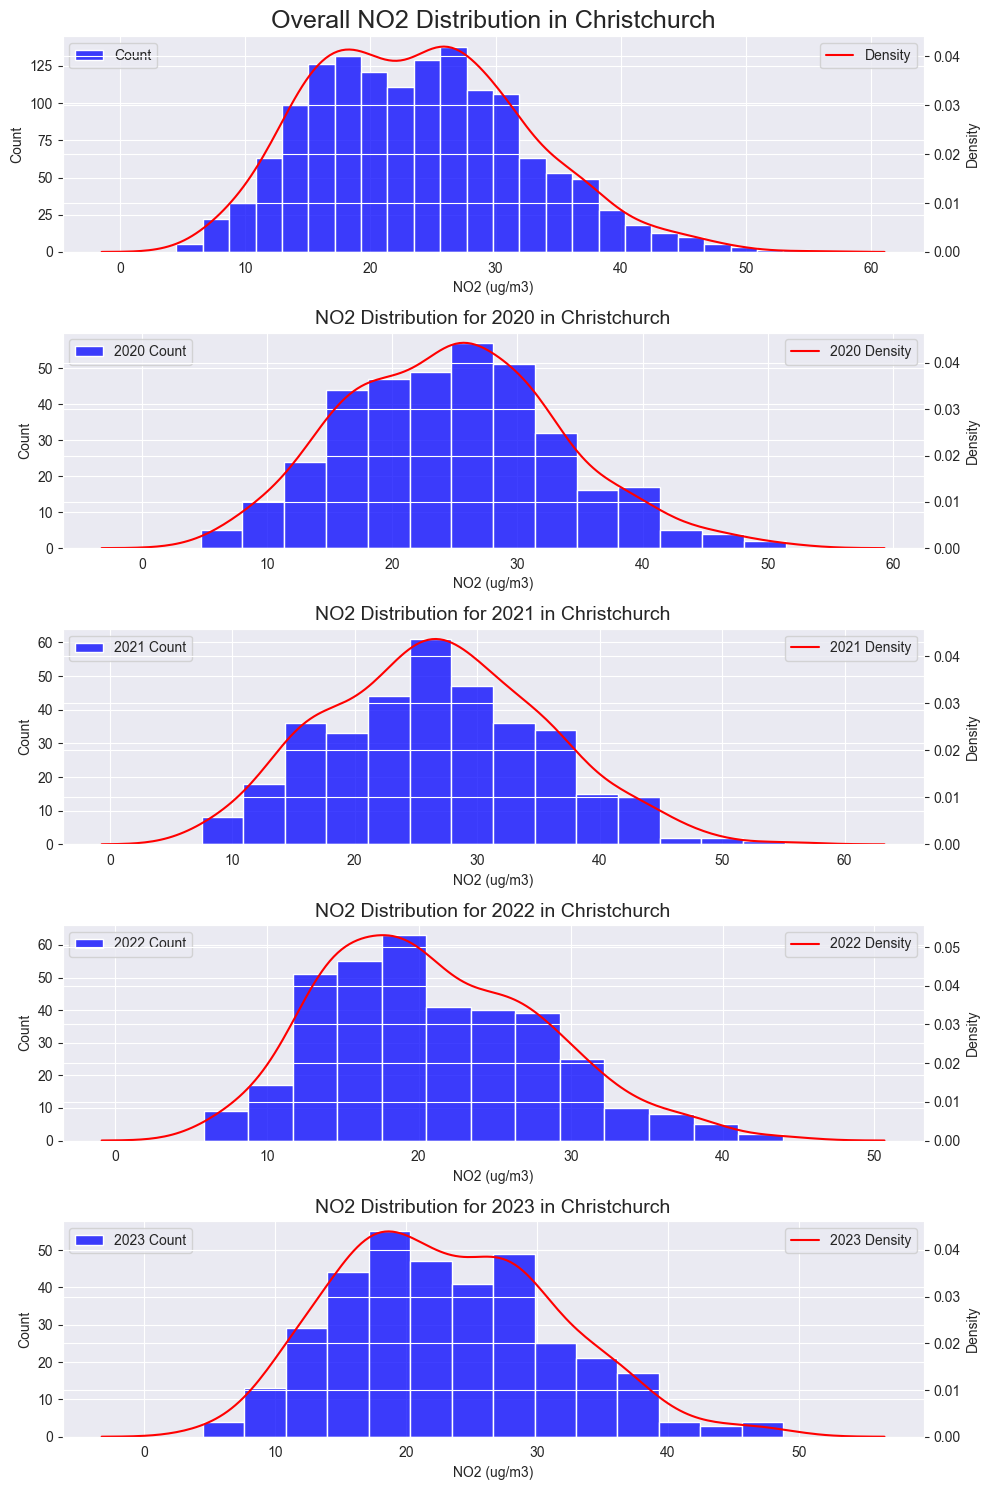

In [38]:
# Box-plot distribution
fig = make_subplots(rows=1, cols=3, subplot_titles=('Year-Wise Distribution', 
                                                    'Month-Wise Distribution', 
                                                    'Overall Distribution'))

fig.add_trace(
    go.Box(x=air_df01['Year'], y=air_df01['Daily Average NO2 (ug/m3)'], name='Year-Wise'),
    row=1, col=1
)

fig.add_trace(
    go.Box(x=air_df01['Month'], y=air_df01['Daily Average NO2 (ug/m3)'], name='Month-Wise'),
    row=1, col=2
)

fig.add_trace(
    go.Box(y=air_df01['Daily Average NO2 (ug/m3)'], name='Overall'),
    row=1, col=3
)

fig.update_layout(height=500, width=1000, 
                  title_text="NO2 Distribution in Christchurch",
                  yaxis1=dict(title='NO2 (ug/m3)'))

fig.show()

# Histogram distribution
fig, axs = plt.subplots(5, 1, figsize=(10, 15))

sns.histplot(x=air_df01['Daily Average NO2 (ug/m3)'], ax=axs[0], label="Count", color='blue')
ax2 = axs[0].twinx()
sns.kdeplot(x=air_df01['Daily Average NO2 (ug/m3)'], ax=ax2, color="red", label="Density")
axs[0].set_title('Overall NO2 Distribution in Christchurch', fontsize=18)
axs[0].set_xlabel('NO2 (ug/m3)')
axs[0].legend(loc='upper left')
ax2.legend(loc='upper right')


for i, year in enumerate(years):
    ax = axs[i + 1]  
    ax2 = ax.twinx()

    yearly_data = air_df01[air_df01['Year'] == year]

    sns.histplot(x=yearly_data['Daily Average NO2 (ug/m3)'], ax=ax, label=f"{year} Count", color='blue')
    sns.kdeplot(x=yearly_data['Daily Average NO2 (ug/m3)'], ax=ax2, color="red", label=f"{year} Density")

    ax.set_title(f'NO2 Distribution for {year} in Christchurch', fontsize=14)
    ax.set_xlabel('NO2 (ug/m3)')
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

sns.set_style('darkgrid')
plt.tight_layout()
plt.show()

### CO

In [39]:
# Daily average value time-trend
fig = make_subplots(rows=5, cols=1, subplot_titles=['Daily Average CO for All Years'] + [f'Daily Average CO for {year}' for year in years])

fig.add_trace(
    go.Scatter(x=air_df01['Date'], y=air_df01['Daily Average CO (mg/m3)'], mode='lines', name='All Years'),
    row=1, col=1
)

for i, year in enumerate(years):
    yearly_data = air_df01[air_df01['Year'] == year]

    fig.add_trace(
        go.Scatter(x=yearly_data['Date'], y=yearly_data['Daily Average CO (mg/m3)'], mode='lines', name=f'{year}'),
        row=i+2, col=1  
    )

fig.update_layout(height=1500, width=1000, title_text="Daily Average CO in Christchurch by Year")
fig.update_xaxes(title_text="Year - Month")
fig.update_yaxes(title_text="CO (mg/m3)")

fig.show()

In [40]:
# Monthly average value time-trend
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']

fig = go.Figure()

for i, year_to_plot in enumerate(years):
    data = air_df02[air_df02['Year'] == year_to_plot]

    fig.add_trace(go.Scatter(
        x=data['Month'], 
        y=data['Daily Average CO (mg/m3)'], 
        mode='lines+markers',
        name=str(year_to_plot),
        marker=dict(color=colors[i % len(colors)])
    ))

    if not data.empty:
        fig.add_trace(go.Scatter(
            x=[data['Month'].iloc[-1]], 
            y=[data['Daily Average CO (mg/m3)'].iloc[-1]], 
            text=[str(year_to_plot)],
            mode='text',
            showlegend=False
        ))

fig.update_layout(
    title='Monthly Average CO in Christchurch',
    xaxis_title='Month',
    yaxis_title='CO (mg/m3)',
    height=500,
    width=1000
)

fig.show()

# Weekly average value timw-trend
fig2 = go.Figure()

for i, year_to_plot in enumerate(years):
    data = air_df03[air_df03['Year'] == year_to_plot]

    fig2.add_trace(go.Scatter(
        x=data['Day of Week'], 
        y=data['Daily Average CO (mg/m3)'], 
        mode='lines+markers',
        name=str(year_to_plot),
        marker=dict(color=colors[i % len(colors)])
    ))

    if not data.empty:
        fig2.add_trace(go.Scatter(
            x=[data['Day of Week'].iloc[-1]], 
            y=[data['Daily Average CO (mg/m3)'].iloc[-1]], 
            text=[str(year_to_plot)],
            mode='text',
            showlegend=False
        ))

fig2.update_layout(
    title='Day of Week Average CO in Christchurch',
    xaxis_title='Day of Week',
    yaxis_title='CO (mg/m3)',
    height=500,
    width=1000
)

fig2.show()

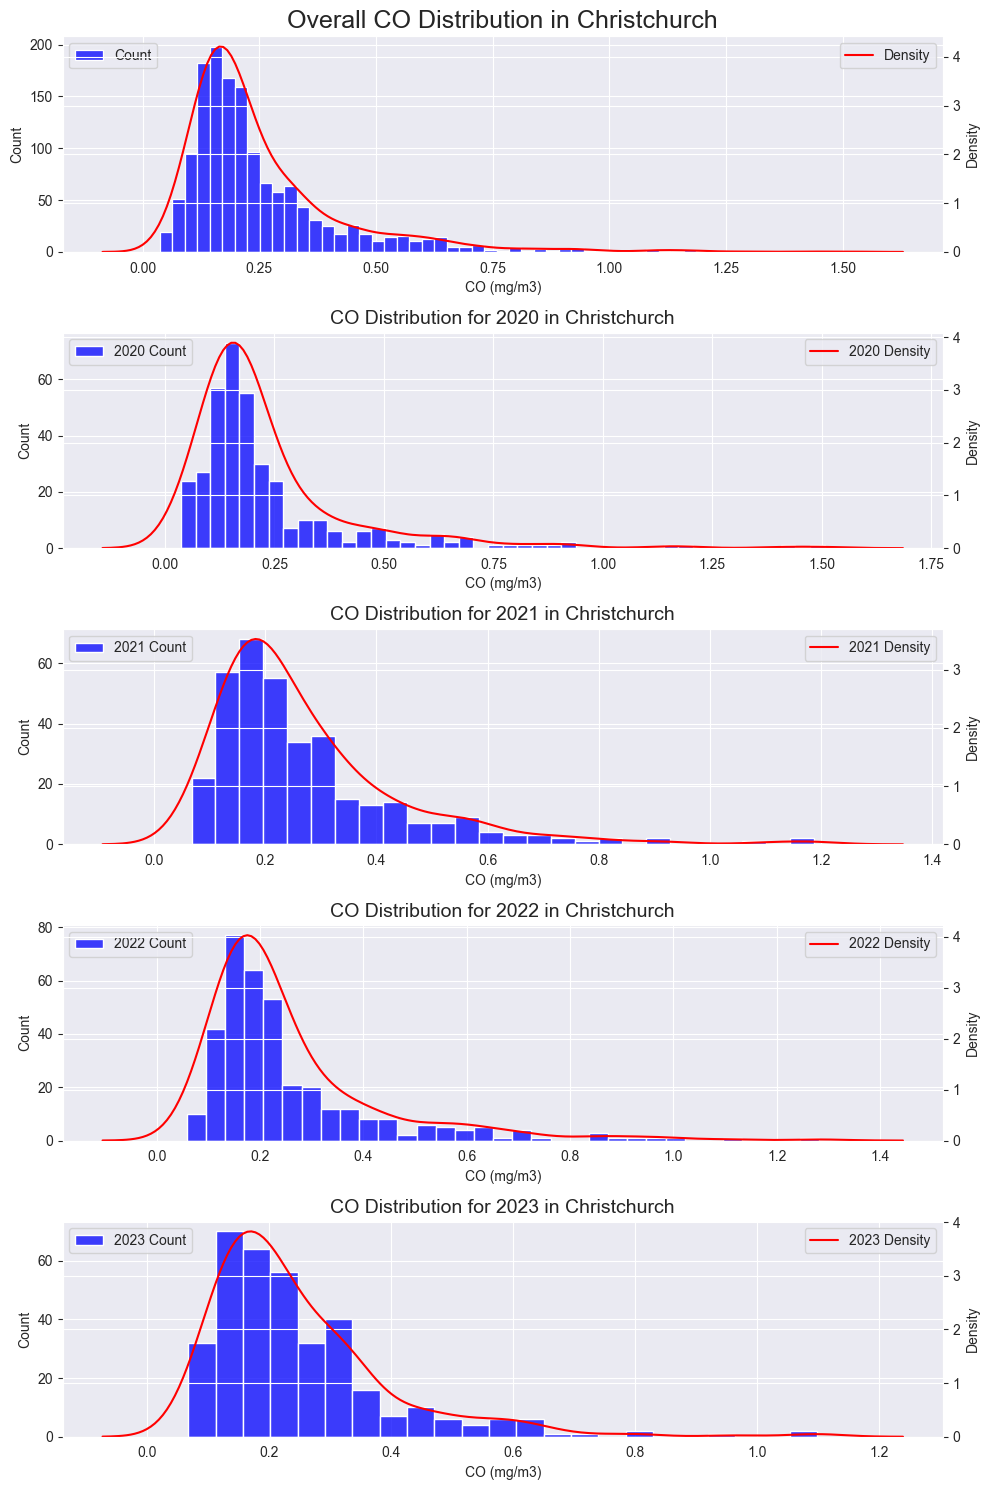

In [41]:
# Box-plot distribution
fig = make_subplots(rows=1, cols=3, subplot_titles=('Year-Wise Distribution', 
                                                    'Month-Wise Distribution', 
                                                    'Overall Distribution'))

fig.add_trace(
    go.Box(x=air_df01['Year'], y=air_df01['Daily Average CO (mg/m3)'], name='Year-Wise'),
    row=1, col=1
)

fig.add_trace(
    go.Box(x=air_df01['Month'], y=air_df01['Daily Average CO (mg/m3)'], name='Month-Wise'),
    row=1, col=2
)

fig.add_trace(
    go.Box(y=air_df01['Daily Average CO (mg/m3)'], name='Overall'),
    row=1, col=3
)

fig.update_layout(height=500, width=1000, 
                  title_text="CO Distribution in Christchurch",
                  yaxis1=dict(title='CO (mg/m3)'))

fig.show()

# Histogram distribution
fig, axs = plt.subplots(5, 1, figsize=(10, 15))

sns.histplot(x=air_df01['Daily Average CO (mg/m3)'], ax=axs[0], label="Count", color='blue')
ax2 = axs[0].twinx()
sns.kdeplot(x=air_df01['Daily Average CO (mg/m3)'], ax=ax2, color="red", label="Density")
axs[0].set_title('Overall CO Distribution in Christchurch', fontsize=18)
axs[0].set_xlabel('CO (mg/m3)')
axs[0].legend(loc='upper left')
ax2.legend(loc='upper right')

for i, year in enumerate(years):
    ax = axs[i + 1]  
    ax2 = ax.twinx()

    yearly_data = air_df01[air_df01['Year'] == year]

    sns.histplot(x=yearly_data['Daily Average CO (mg/m3)'], ax=ax, label=f"{year} Count", color='blue')
    sns.kdeplot(x=yearly_data['Daily Average CO (mg/m3)'], ax=ax2, color="red", label=f"{year} Density")

    ax.set_title(f'CO Distribution for {year} in Christchurch', fontsize=14)
    ax.set_xlabel('CO (mg/m3)')
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

sns.set_style('darkgrid')
plt.tight_layout()
plt.show()

### Wind speed

In [42]:
# Daily average value time-trend
fig = make_subplots(rows=5, cols=1, subplot_titles=['Daily Average Wind Speed for All Years'] + [f'Daily Average Wind Speed for {year}' for year in years])

fig.add_trace(
    go.Scatter(x=air_df01['Date'], y=air_df01['WSpd(m/s)'], mode='lines', name='All Years'),
    row=1, col=1
)

for i, year in enumerate(years):
    yearly_data = air_df01[air_df01['Year'] == year]

    fig.add_trace(
        go.Scatter(x=yearly_data['Date'], y=yearly_data['WSpd(m/s)'], mode='lines', name=f'{year}'),
        row=i+2, col=1  
    )

fig.update_layout(height=1500, width=1000, title_text="Daily Average Wind Speed in Christchurch by Year")
fig.update_xaxes(title_text="Year - Month")
fig.update_yaxes(title_text="Wind Speed (m/s)")

fig.show()

In [43]:
# Monthly average value time-trend
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']

fig = go.Figure()

for i, year_to_plot in enumerate(years):
    data = air_df02[air_df02['Year'] == year_to_plot]

    fig.add_trace(go.Scatter(
        x=data['Month'], 
        y=data['WSpd(m/s)'], 
        mode='lines+markers',
        name=str(year_to_plot),
        marker=dict(color=colors[i % len(colors)])
    ))

    if not data.empty:
        fig.add_trace(go.Scatter(
            x=[data['Month'].iloc[-1]], 
            y=[data['WSpd(m/s)'].iloc[-1]], 
            text=[str(year_to_plot)],
            mode='text',
            showlegend=False
        ))

fig.update_layout(
    title='Monthly Average Wind Speed in Christchurch',
    xaxis_title='Month',
    yaxis_title='Wind Speed (m/s)',
    height=500,
    width=1000
)

fig.show()

#Weekly average value time-trend
fig2 = go.Figure()

for i, year_to_plot in enumerate(years):
    data = air_df03[air_df03['Year'] == year_to_plot]

    fig2.add_trace(go.Scatter(
        x=data['Day of Week'], 
        y=data['WSpd(m/s)'], 
        mode='lines+markers',
        name=str(year_to_plot),
        marker=dict(color=colors[i % len(colors)])
    ))

    if not data.empty:
        fig2.add_trace(go.Scatter(
            x=[data['Day of Week'].iloc[-1]], 
            y=[data['WSpd(m/s)'].iloc[-1]], 
            text=[str(year_to_plot)],
            mode='text',
            showlegend=False
        ))

fig2.update_layout(
    title='Day of Week Average Wind Speed in Wellington',
    xaxis_title='Day of Week',
    yaxis_title='Wind Speed (m/s)',
    height=500,
    width=1000
)

fig2.show()

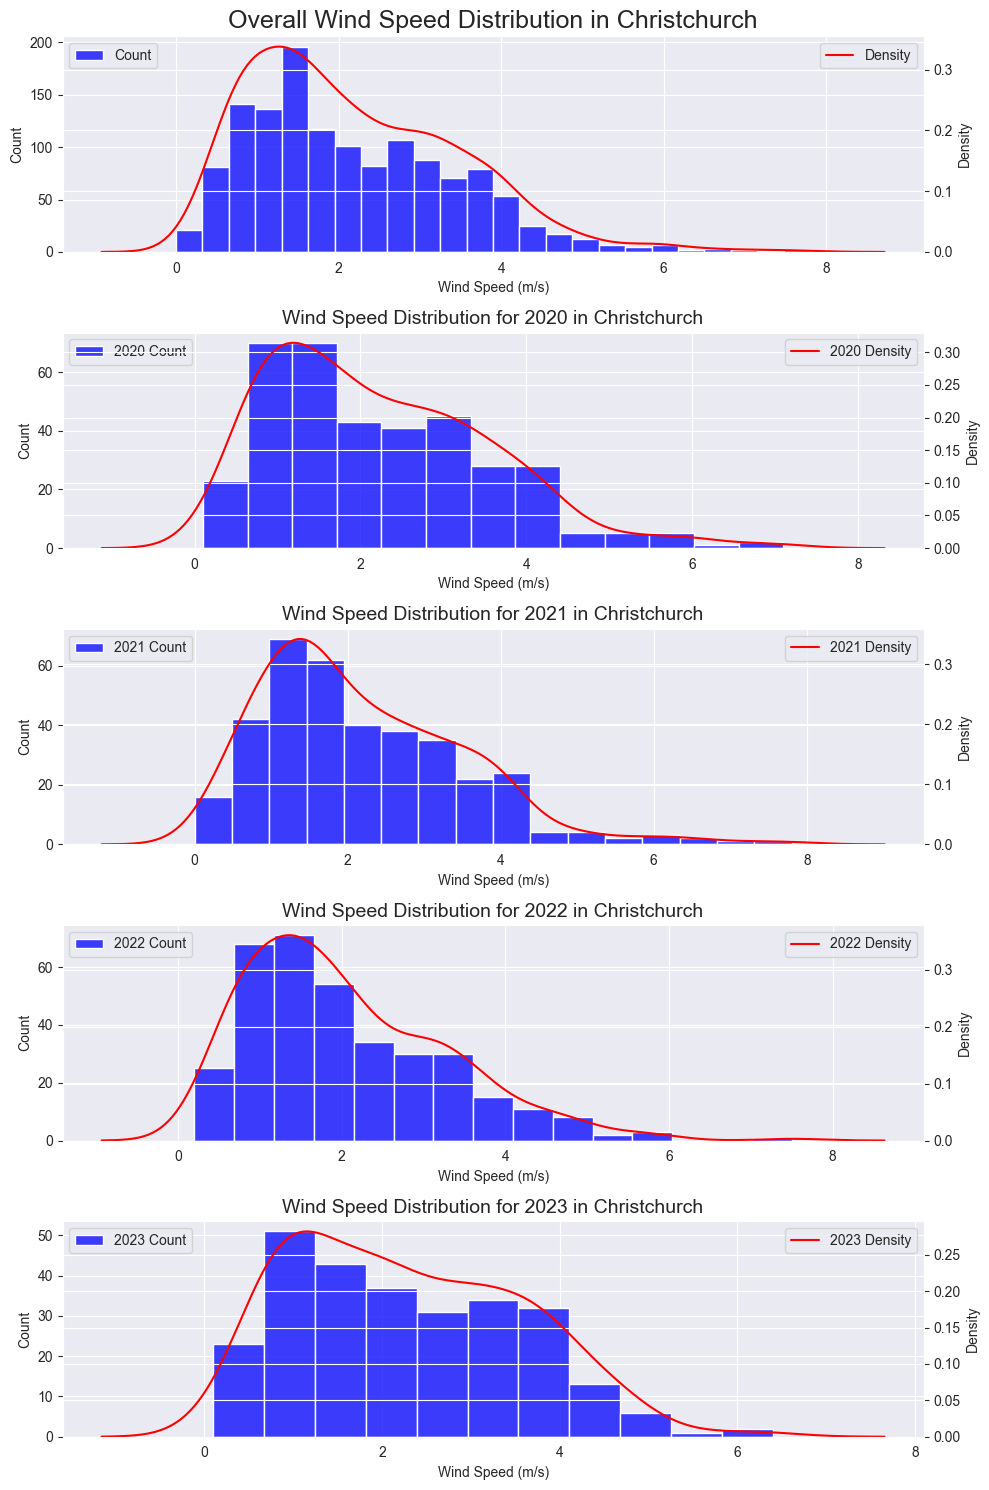

In [44]:
# Box-plot distribution
fig = make_subplots(rows=1, cols=3, subplot_titles=('Year-Wise Distribution', 
                                                    'Month-Wise Distribution', 
                                                    'Overall Distribution'))

fig.add_trace(
    go.Box(x=air_df01['Year'], y=air_df01['WSpd(m/s)'], name='Year-Wise'),
    row=1, col=1
)

fig.add_trace(
    go.Box(x=air_df01['Month'], y=air_df01['WSpd(m/s)'], name='Month-Wise'),
    row=1, col=2
)

fig.add_trace(
    go.Box(y=air_df01['WSpd(m/s)'], name='Overall'),
    row=1, col=3
)

fig.update_layout(height=500, width=1000, 
                  title_text="Wind Speed Distribution in Christchurch",
                  yaxis1=dict(title='Wind Speed (m/s)'))

fig.show()

# Histogram distribution
fig, axs = plt.subplots(5, 1, figsize=(10, 15))

sns.histplot(x=air_df01['WSpd(m/s)'], ax=axs[0], label="Count", color='blue')
ax2 = axs[0].twinx()
sns.kdeplot(x=air_df01['WSpd(m/s)'], ax=ax2, color="red", label="Density")
axs[0].set_title('Overall Wind Speed Distribution in Christchurch', fontsize=18)
axs[0].set_xlabel('Wind Speed (m/s)')
axs[0].legend(loc='upper left')
ax2.legend(loc='upper right')

for i, year in enumerate(years):
    ax = axs[i + 1]  
    ax2 = ax.twinx()

    yearly_data = air_df01[air_df01['Year'] == year]

    sns.histplot(x=yearly_data['WSpd(m/s)'], ax=ax, label=f"{year} Count", color='blue')
    sns.kdeplot(x=yearly_data['WSpd(m/s)'], ax=ax2, color="red", label=f"{year} Density")

    ax.set_title(f'Wind Speed Distribution for {year} in Christchurch', fontsize=14)
    ax.set_xlabel('Wind Speed (m/s)')
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

sns.set_style('darkgrid')
plt.tight_layout()
plt.show()

### Temperature

In [45]:
# Daily average value time-trend
fig = make_subplots(rows=5, cols=1, subplot_titles=['Daily Average Temperature for All Years'] + [f'Daily Average Temperature for {year}' for year in years])

fig.add_trace(
    go.Scatter(x=air_df01['Date'], y=air_df01['T(C)'], mode='lines', name='All Years'),
    row=1, col=1
)

for i, year in enumerate(years):
    yearly_data = air_df01[air_df01['Year'] == year]

    fig.add_trace(
        go.Scatter(x=yearly_data['Date'], y=yearly_data['T(C)'], mode='lines', name=f'{year}'),
        row=i+2, col=1  
    )

fig.update_layout(height=1500, width=1000, title_text="Daily Average Temperature in Christchurch by Year")
fig.update_xaxes(title_text="Year - Month")
fig.update_yaxes(title_text="Temperature (\u00B0C)")

fig.show()

In [46]:
# Monthly average value time-trend
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']

fig = go.Figure()

for i, year_to_plot in enumerate(years):
    data = air_df02[air_df02['Year'] == year_to_plot]

    fig.add_trace(go.Scatter(
        x=data['Month'], 
        y=data['T(C)'], 
        mode='lines+markers',
        name=str(year_to_plot),
        marker=dict(color=colors[i % len(colors)])
    ))

    if not data.empty:
        fig.add_trace(go.Scatter(
            x=[data['Month'].iloc[-1]], 
            y=[data['T(C)'].iloc[-1]], 
            text=[str(year_to_plot)],
            mode='text',
            showlegend=False
        ))

fig.update_layout(
    title='Monthly Average Temperature in Christchurch',
    xaxis_title='Month',
    yaxis_title='Temperature (\u00B0C)',
    height=500,
    width=1000
)

fig.show()

#Weekly average value time-trend
fig2 = go.Figure()

for i, year_to_plot in enumerate(years):
    data = air_df03[air_df03['Year'] == year_to_plot]

    fig2.add_trace(go.Scatter(
        x=data['Day of Week'], 
        y=data['T(C)'], 
        mode='lines+markers',
        name=str(year_to_plot),
        marker=dict(color=colors[i % len(colors)])
    ))

    if not data.empty:
        fig2.add_trace(go.Scatter(
            x=[data['Day of Week'].iloc[-1]], 
            y=[data['T(C)'].iloc[-1]], 
            text=[str(year_to_plot)],
            mode='text',
            showlegend=False
        ))

fig2.update_layout(
    title='Day of Week Average Temperature in Christchurch',
    xaxis_title='Day of Week',
    yaxis_title='Temperature (\u00B0C)',
    height=500,
    width=1000
)

fig2.show()

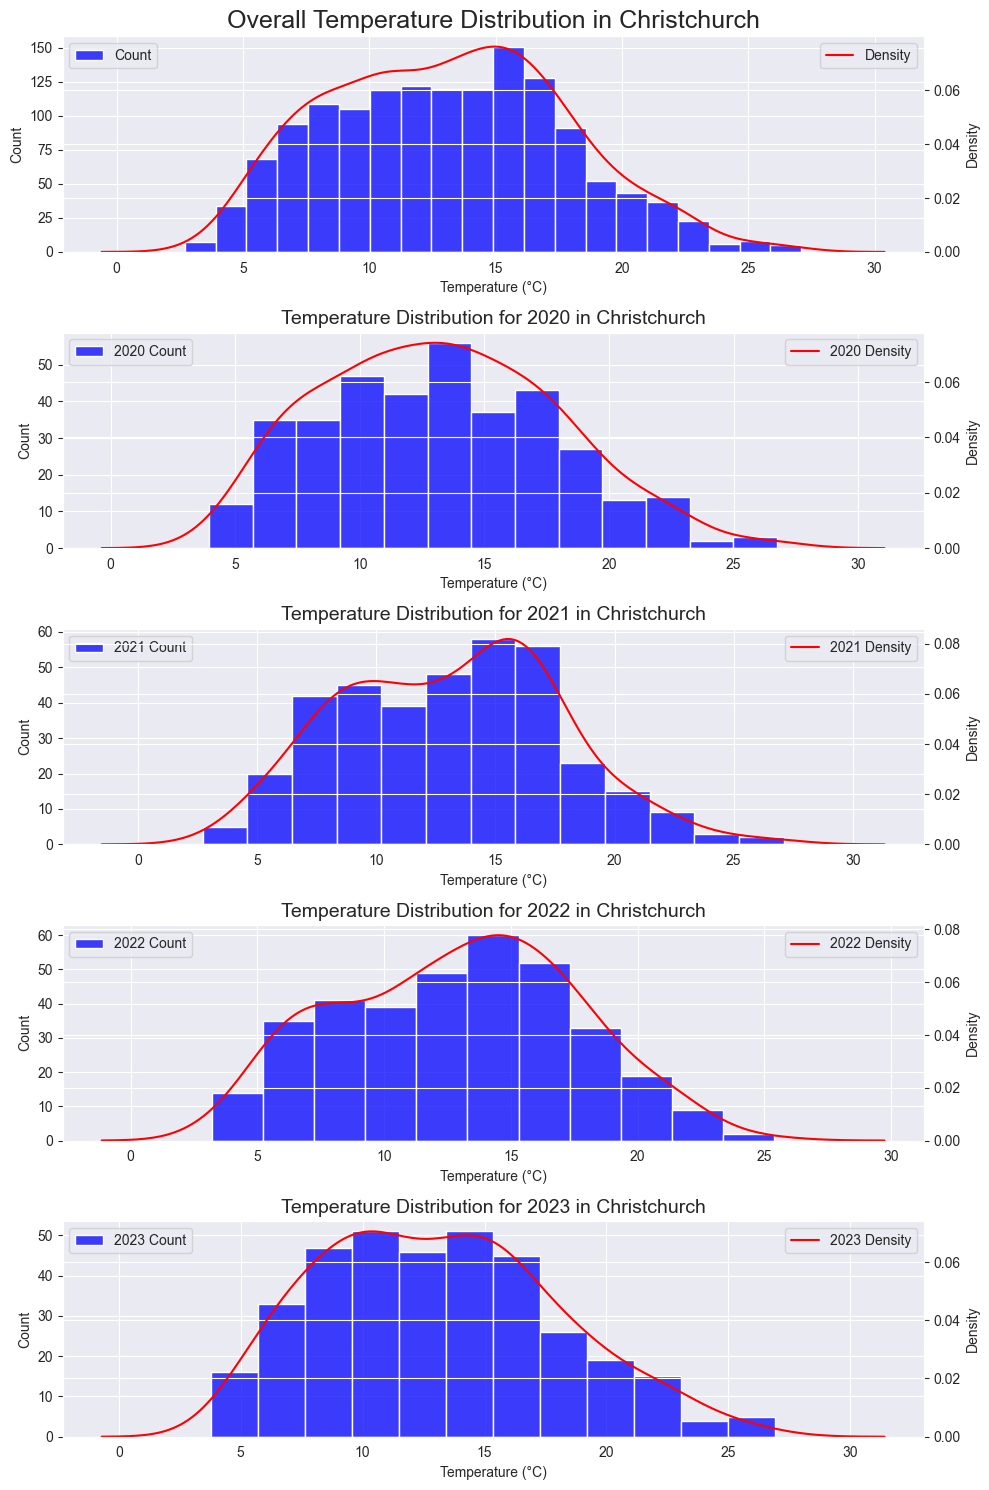

In [47]:
# Box-plot distribution
fig = make_subplots(rows=1, cols=3, subplot_titles=('Year-Wise Distribution', 
                                                    'Month-Wise Distribution', 
                                                    'Overall Distribution'))

fig.add_trace(
    go.Box(x=air_df01['Year'], y=air_df01['T(C)'], name='Year-Wise'),
    row=1, col=1
)

fig.add_trace(
    go.Box(x=air_df01['Month'], y=air_df01['T(C)'], name='Month-Wise'),
    row=1, col=2
)

fig.add_trace(
    go.Box(y=air_df01['T(C)'], name='Overall'),
    row=1, col=3
)

fig.update_layout(height=500, width=1000, 
                  title_text="Temperature Distribution in Christchurch",
                  yaxis1=dict(title='Temperature (\u00B0C)'))

fig.show()

# Histogram distribution
fig, axs = plt.subplots(5, 1, figsize=(10, 15))

sns.histplot(x=air_df01['T(C)'], ax=axs[0], label="Count", color='blue')
ax2 = axs[0].twinx()
sns.kdeplot(x=air_df01['T(C)'], ax=ax2, color="red", label="Density")
axs[0].set_title('Overall Temperature Distribution in Christchurch', fontsize=18)
axs[0].set_xlabel('Temperature (\u00B0C)')
axs[0].legend(loc='upper left')
ax2.legend(loc='upper right')

for i, year in enumerate(years):
    ax = axs[i + 1]  
    ax2 = ax.twinx()

    yearly_data = air_df01[air_df01['Year'] == year]

    sns.histplot(x=yearly_data['T(C)'], ax=ax, label=f"{year} Count", color='blue')
    sns.kdeplot(x=yearly_data['T(C)'], ax=ax2, color="red", label=f"{year} Density")

    ax.set_title(f'Temperature Distribution for {year} in Christchurch', fontsize=14)
    ax.set_xlabel('Temperature (\u00B0C)')
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

sns.set_style('darkgrid')
plt.tight_layout()
plt.show()

### Relative humidity

In [48]:
# Daily average value time-trend
fig = make_subplots(rows=5, cols=1, subplot_titles=['Daily Average Relative Humidity for All Years'] + [f'Daily Average Relative Humidity for {year}' for year in years])

fig.add_trace(
    go.Scatter(x=air_df01['Date'], y=air_df01['RH(%)'], mode='lines', name='All Years'),
    row=1, col=1
)

for i, year in enumerate(years):
    yearly_data = air_df01[air_df01['Year'] == year]

    fig.add_trace(
        go.Scatter(x=yearly_data['Date'], y=yearly_data['RH(%)'], mode='lines', name=f'{year}'),
        row=i+2, col=1  
    )

fig.update_layout(height=1500, width=1000, title_text="Daily Average Relative Humidity in Christchurch by Year")
fig.update_xaxes(title_text="Year - Month")
fig.update_yaxes(title_text="Humidity (%)")

fig.show()

In [49]:
# Monthly average value time-trend
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']

fig = go.Figure()

for i, year_to_plot in enumerate(years):
    data = air_df02[air_df02['Year'] == year_to_plot]

    fig.add_trace(go.Scatter(
        x=data['Month'], 
        y=data['RH(%)'], 
        mode='lines+markers',
        name=str(year_to_plot),
        marker=dict(color=colors[i % len(colors)])
    ))

    if not data.empty:
        fig.add_trace(go.Scatter(
            x=[data['Month'].iloc[-1]], 
            y=[data['RH(%)'].iloc[-1]], 
            text=[str(year_to_plot)],
            mode='text',
            showlegend=False
        ))

fig.update_layout(
    title='Monthly Average Relative Humidity in Christchurch',
    xaxis_title='Month',
    yaxis_title='Humidity (%)',
    height=500,
    width=1000
)

fig.show()

#Weekly average value time-trend
fig2 = go.Figure()

for i, year_to_plot in enumerate(years):
    data = air_df03[air_df03['Year'] == year_to_plot]

    fig2.add_trace(go.Scatter(
        x=data['Day of Week'], 
        y=data['RH(%)'], 
        mode='lines+markers',
        name=str(year_to_plot),
        marker=dict(color=colors[i % len(colors)])
    ))

    if not data.empty:
        fig2.add_trace(go.Scatter(
            x=[data['Day of Week'].iloc[-1]], 
            y=[data['RH(%)'].iloc[-1]], 
            text=[str(year_to_plot)],
            mode='text',
            showlegend=False
        ))

fig2.update_layout(
    title='Day of Week Average Relative Humidity in Christchurch',
    xaxis_title='Day of Week',
    yaxis_title='Humidity (%)',
    height=500,
    width=1000
)

fig2.show()

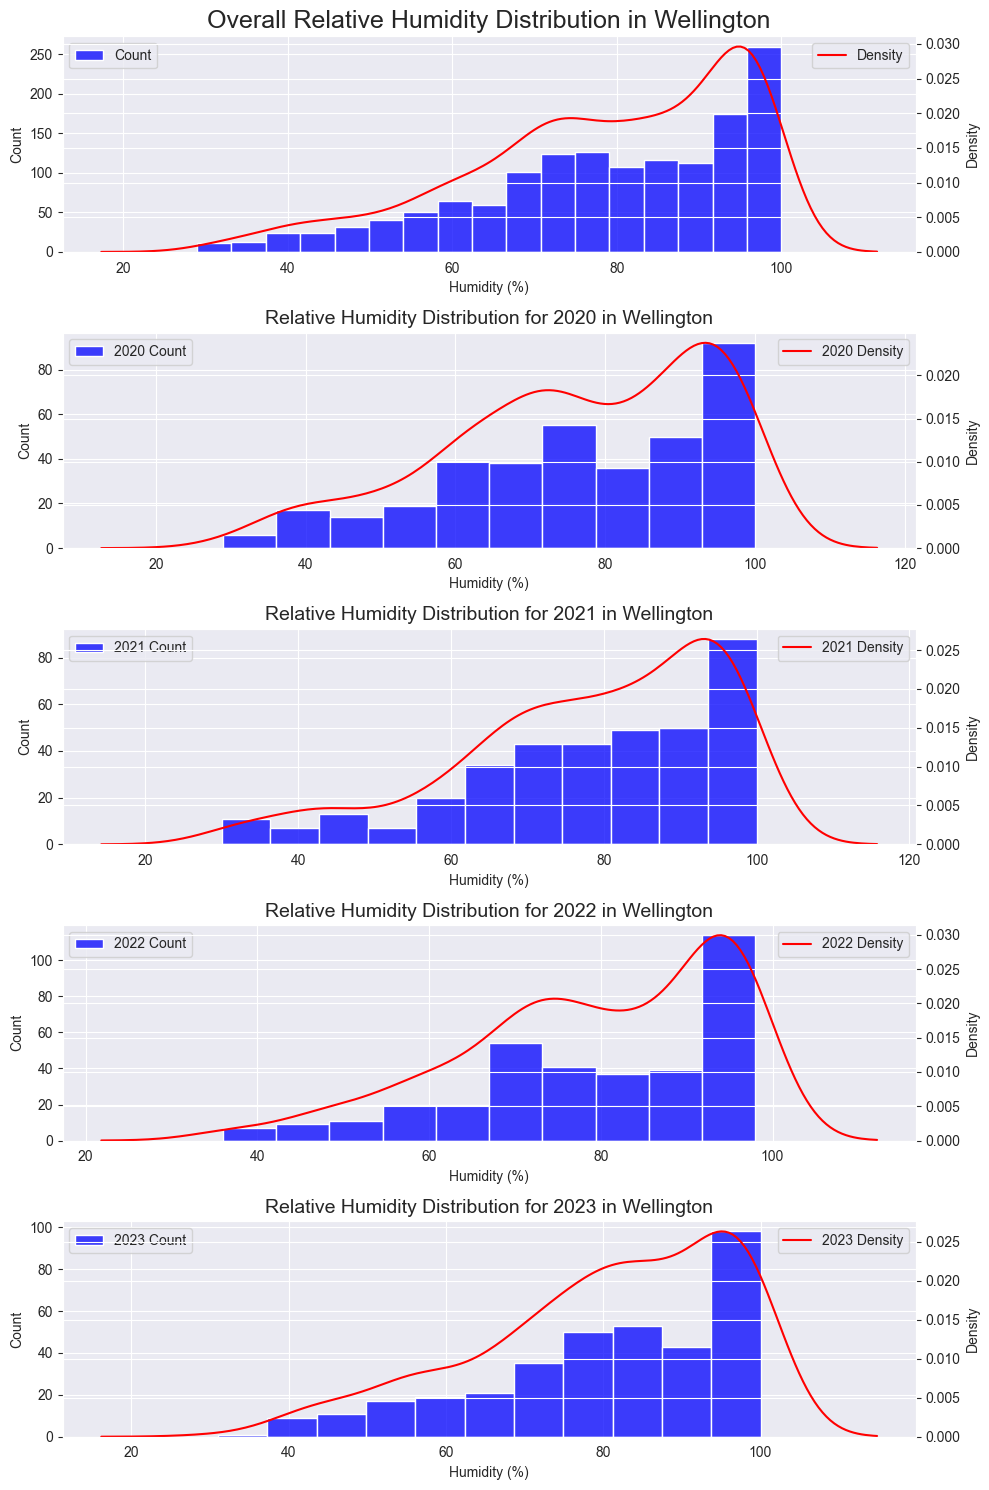

In [50]:
# Box-plot distribution
fig = make_subplots(rows=1, cols=3, subplot_titles=('Year-Wise Distribution', 
                                                    'Month-Wise Distribution', 
                                                    'Overall Distribution'))

fig.add_trace(
    go.Box(x=air_df01['Year'], y=air_df01['RH(%)'], name='Year-Wise'),
    row=1, col=1
)

fig.add_trace(
    go.Box(x=air_df01['Month'], y=air_df01['RH(%)'], name='Month-Wise'),
    row=1, col=2
)

fig.add_trace(
    go.Box(y=air_df01['RH(%)'], name='Overall'),
    row=1, col=3
)

fig.update_layout(height=500, width=1000, 
                  title_text="Relative Humidity Distribution in Wellington",
                  yaxis1=dict(title='Humidity (%)'))

fig.show()

# Histogram distribution
fig, axs = plt.subplots(5, 1, figsize=(10, 15))

sns.histplot(x=air_df01['RH(%)'], ax=axs[0], label="Count", color='blue')
ax2 = axs[0].twinx()
sns.kdeplot(x=air_df01['RH(%)'], ax=ax2, color="red", label="Density")
axs[0].set_title('Overall Relative Humidity Distribution in Wellington', fontsize=18)
axs[0].set_xlabel('Humidity (%)')
axs[0].legend(loc='upper left')
ax2.legend(loc='upper right')

for i, year in enumerate(years):
    ax = axs[i + 1]  
    ax2 = ax.twinx()

    yearly_data = air_df01[air_df01['Year'] == year]

    sns.histplot(x=yearly_data['RH(%)'], ax=ax, label=f"{year} Count", color='blue')
    sns.kdeplot(x=yearly_data['RH(%)'], ax=ax2, color="red", label=f"{year} Density")

    ax.set_title(f'Relative Humidity Distribution for {year} in Wellington', fontsize=14)
    ax.set_xlabel('Humidity (%)')
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

sns.set_style('darkgrid')
plt.tight_layout()
plt.show()

### Traffic count

In [51]:
# Daily average value time-trend
fig = make_subplots(rows=5, cols=1, subplot_titles=['Daily Average Traffic for All Years'] + [f'Daily Average Traffic for {year}' for year in years])

fig.add_trace(
    go.Scatter(x=air_df01['Date'], y=air_df01['trafficCount'], mode='lines', name='All Years'),
    row=1, col=1
)

for i, year in enumerate(years):
    yearly_data = air_df01[air_df01['Year'] == year]

    fig.add_trace(
        go.Scatter(x=yearly_data['Date'], y=yearly_data['trafficCount'], mode='lines', name=f'{year}'),
        row=i+2, col=1  
    )

fig.update_layout(height=1500, width=1000, title_text="Daily Average Traffic in Christchurch by Year")
fig.update_xaxes(title_text="Year - Month")
fig.update_yaxes(title_text="Traffic Flow")

fig.show()

In [52]:
# Monthly average value time-trend
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']

fig = go.Figure()

for i, year_to_plot in enumerate(years):
    data = air_df02[air_df02['Year'] == year_to_plot]

    fig.add_trace(go.Scatter(
        x=data['Month'], 
        y=data['trafficCount'], 
        mode='lines+markers',
        name=str(year_to_plot),
        marker=dict(color=colors[i % len(colors)])
    ))

    if not data.empty:
        fig.add_trace(go.Scatter(
            x=[data['Month'].iloc[-1]], 
            y=[data['trafficCount'].iloc[-1]], 
            text=[str(year_to_plot)],
            mode='text',
            showlegend=False
        ))

fig.update_layout(
    title='Monthly Average Traffic in Christchurch',
    xaxis_title='Month',
    yaxis_title='Traffic Flow',
    height=500,
    width=1000
)

fig.show()

# Weekly average value time-trend
fig2 = go.Figure()

for i, year_to_plot in enumerate(years):
    data = air_df03[air_df03['Year'] == year_to_plot]

    fig2.add_trace(go.Scatter(
        x=data['Day of Week'], 
        y=data['trafficCount'], 
        mode='lines+markers',
        name=str(year_to_plot),
        marker=dict(color=colors[i % len(colors)])
    ))

    if not data.empty:
        fig2.add_trace(go.Scatter(
            x=[data['Day of Week'].iloc[-1]], 
            y=[data['trafficCount'].iloc[-1]], 
            text=[str(year_to_plot)],
            mode='text',
            showlegend=False
        ))

fig2.update_layout(
    title='Day of Week Average Traffic in Christchurch',
    xaxis_title='Day of Week',
    yaxis_title='Traffic Flow',
    height=500,
    width=1000
)

fig2.show()

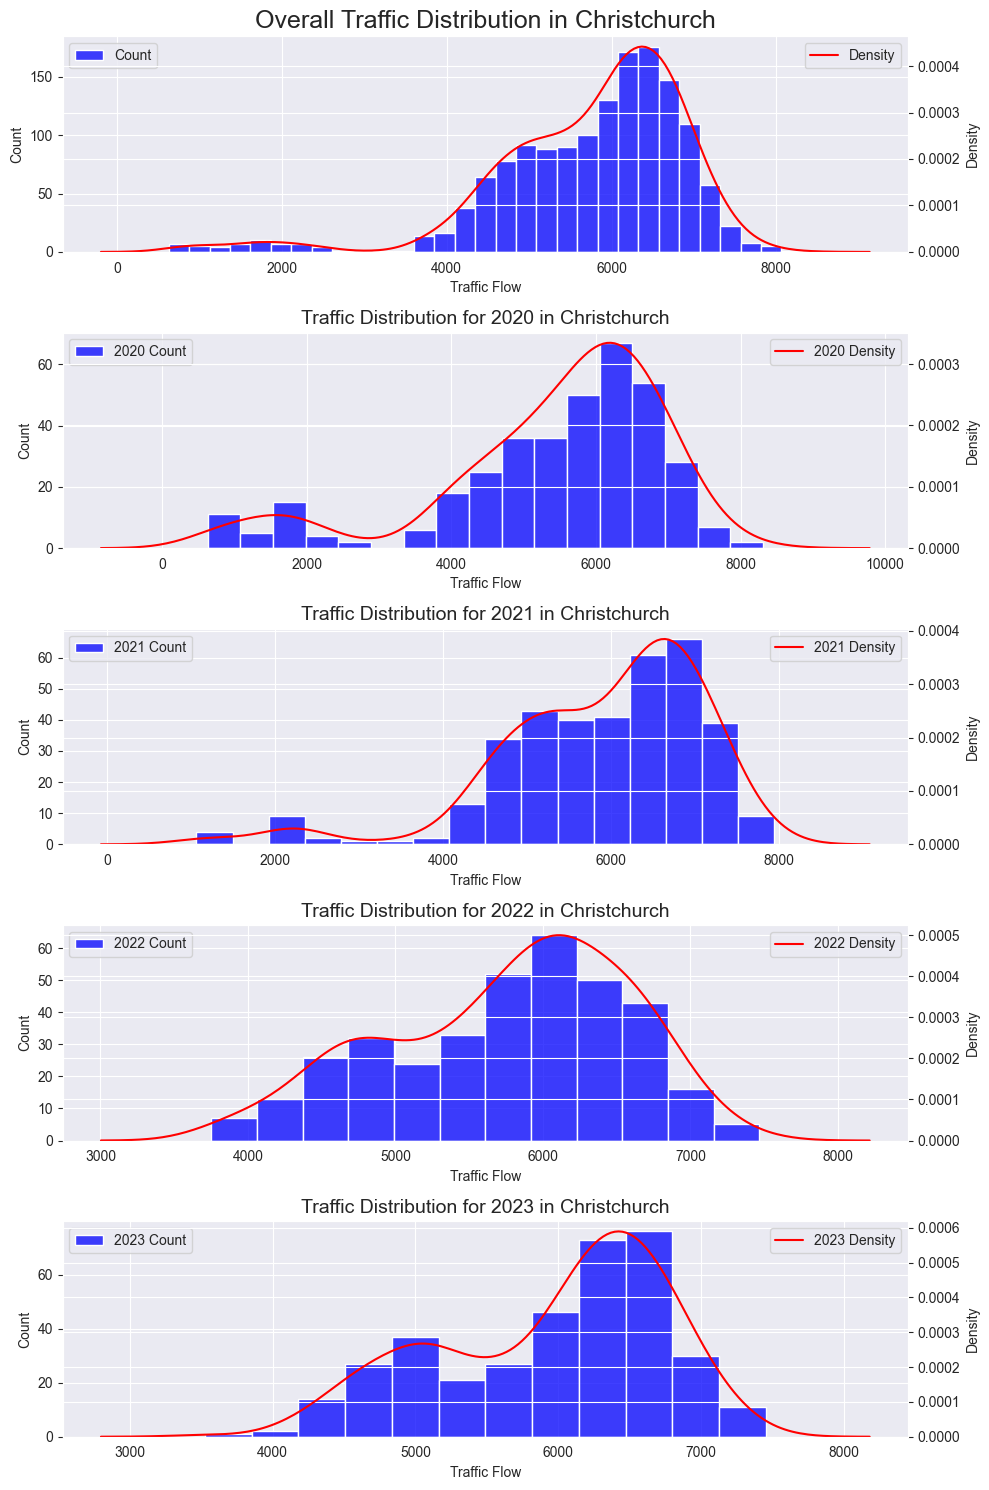

In [53]:
# Box-plot distribution
fig = make_subplots(rows=1, cols=3, subplot_titles=('Year-Wise Distribution', 
                                                    'Month-Wise Distribution', 
                                                    'Overall Distribution'))

fig.add_trace(
    go.Box(x=air_df01['Year'], y=air_df01['trafficCount'], name='Year-Wise'),
    row=1, col=1
)

fig.add_trace(
    go.Box(x=air_df01['Month'], y=air_df01['trafficCount'], name='Month-Wise'),
    row=1, col=2
)

fig.add_trace(
    go.Box(y=air_df01['trafficCount'], name='Overall'),
    row=1, col=3
)

fig.update_layout(height=500, width=1000, 
                  title_text="Traffic Distribution in Christchurch",
                  yaxis1=dict(title='Traffic Flow'))

fig.show()

# Histogram distribution
fig, axs = plt.subplots(5, 1, figsize=(10, 15))

sns.histplot(x=air_df01['trafficCount'], ax=axs[0], label="Count", color='blue')
ax2 = axs[0].twinx()
sns.kdeplot(x=air_df01['trafficCount'], ax=ax2, color="red", label="Density")
axs[0].set_title('Overall Traffic Distribution in Christchurch', fontsize=18)
axs[0].set_xlabel('Traffic Flow')
axs[0].legend(loc='upper left')
ax2.legend(loc='upper right')

for i, year in enumerate(years):
    ax = axs[i + 1]  
    ax2 = ax.twinx()

    yearly_data = air_df01[air_df01['Year'] == year]

    sns.histplot(x=yearly_data['trafficCount'], ax=ax, label=f"{year} Count", color='blue')
    sns.kdeplot(x=yearly_data['trafficCount'], ax=ax2, color="red", label=f"{year} Density")

    ax.set_title(f'Traffic Distribution for {year} in Christchurch', fontsize=14)
    ax.set_xlabel('Traffic Flow')
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

sns.set_style('darkgrid')
plt.tight_layout()
plt.show()

## Correlation Analysis

Text(0.5, 1.0, 'Correlation Matrix for Christchurch')

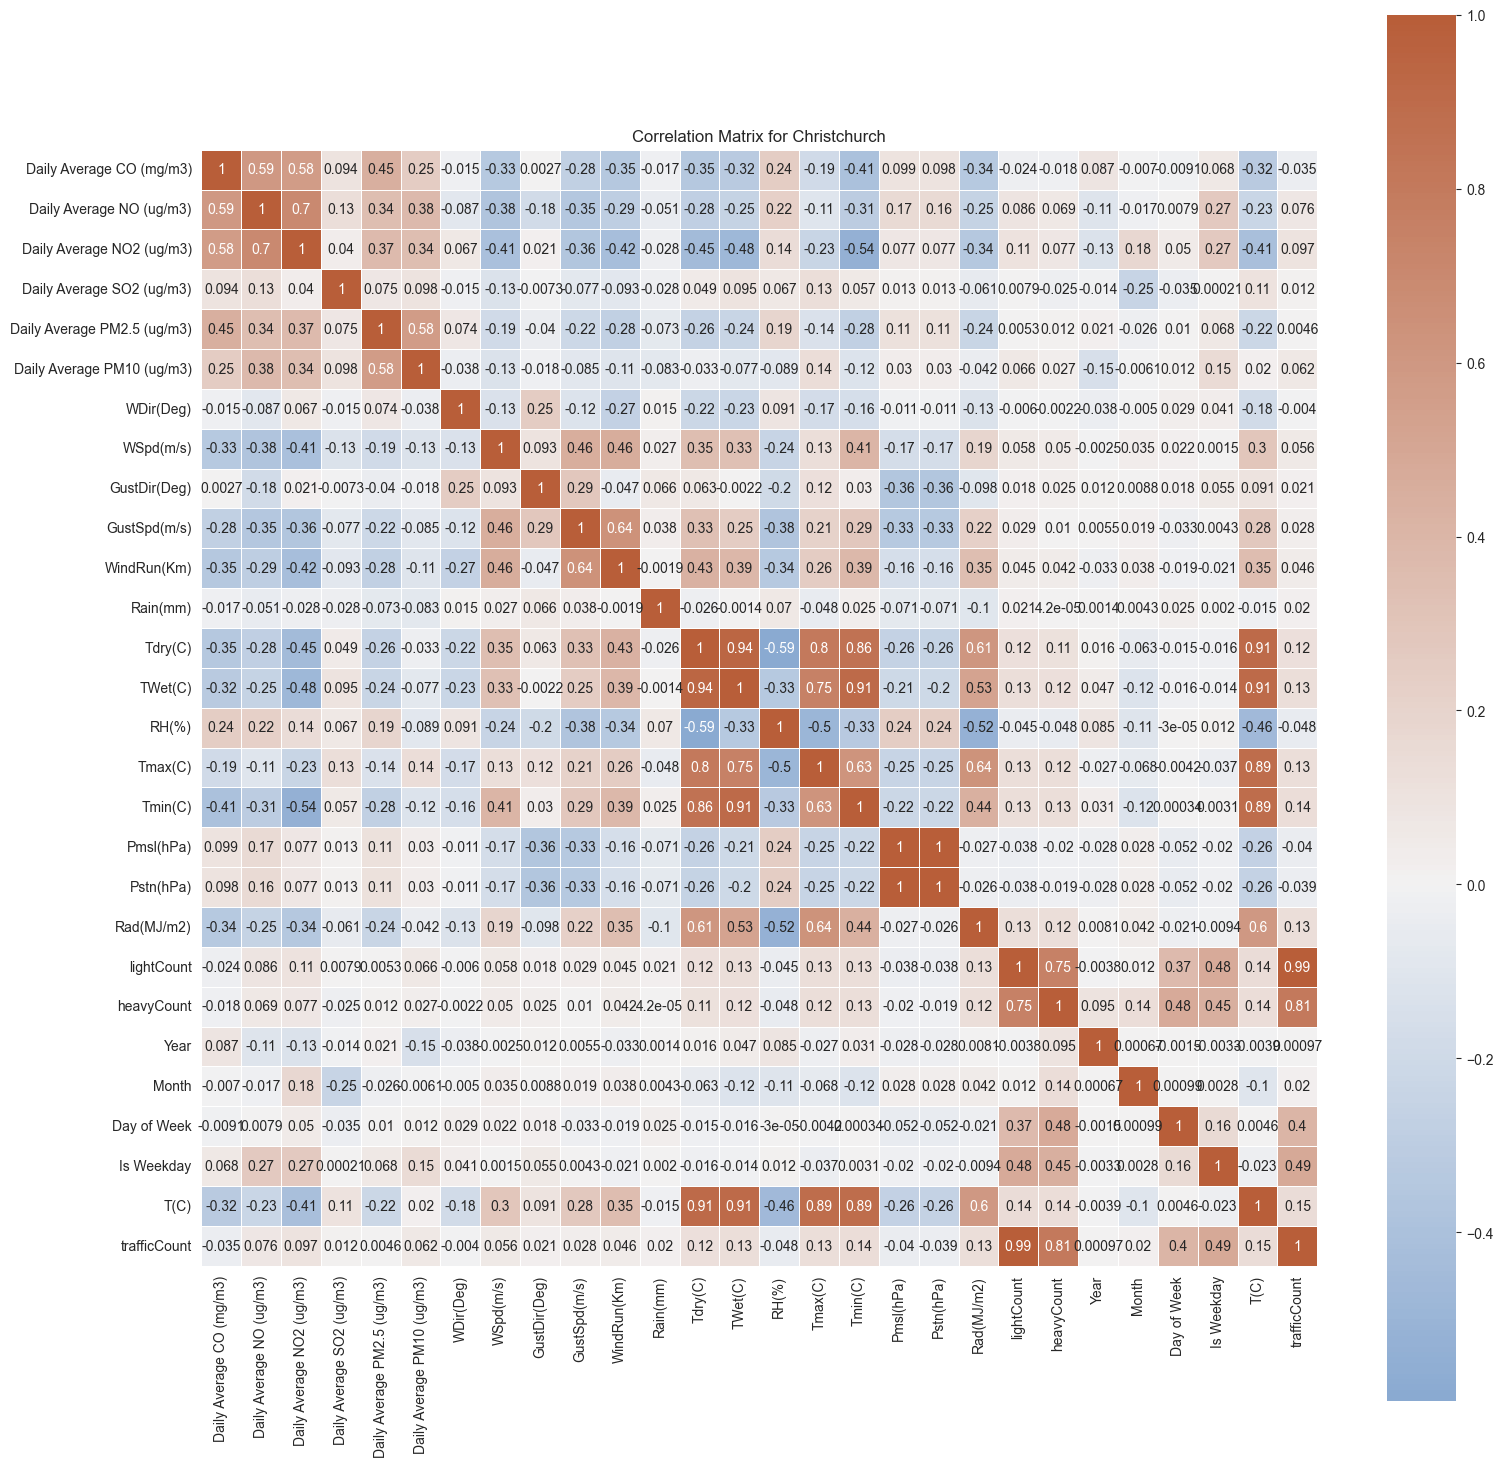

In [54]:
air_df06 = air_df04.copy()
air_df06 = air_df04.drop(['Date'], axis=1)

corr =air_df06.corr()

# sns.heatmap(corr, annot=True, fmt=".2f")
# sns.set(rc={'figure.figsize':(30,30)})

f, ax = plt.subplots(figsize=(18, 18))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=None, center=0, square=True, annot=True, linewidths=.5)

plt.title('Correlation Matrix for Christchurch')

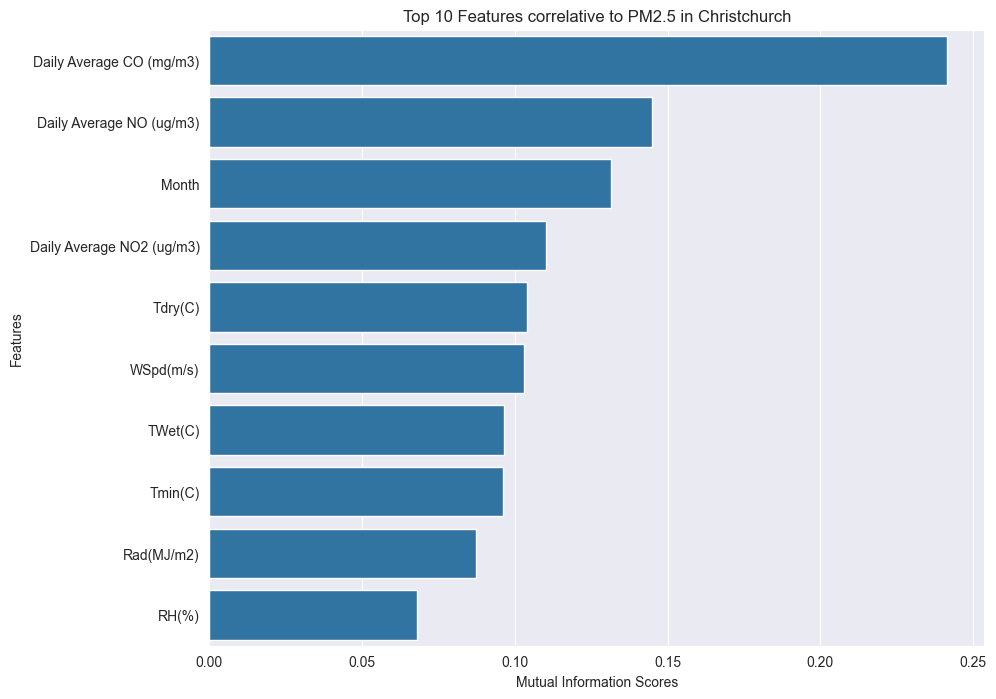

In [55]:
# Assuming PM2.5 as target feature
X = air_df06.drop(['Daily Average PM2.5 (ug/m3)', 'Daily Average PM10 (ug/m3)', 'T(C)', 'trafficCount'], axis=1)
y = air_df06['Daily Average PM2.5 (ug/m3)']

# Select 10 best variables using ANOVA
selector = SelectKBest(mutual_info_regression, k=10)
selector.fit(X, y)

support = selector.get_support()
features = X.loc[:,support].columns.tolist()
scores = selector.scores_[support]

features_scores = pd.DataFrame({'Feature': features, 'Score': scores})
features_scores = features_scores.sort_values(by='Score', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Score', y='Feature', data=features_scores)
plt.title('Top 10 Features correlative to PM2.5 in Christchurch')
plt.xlabel('Mutual Information Scores')
plt.ylabel('Features')
plt.show()

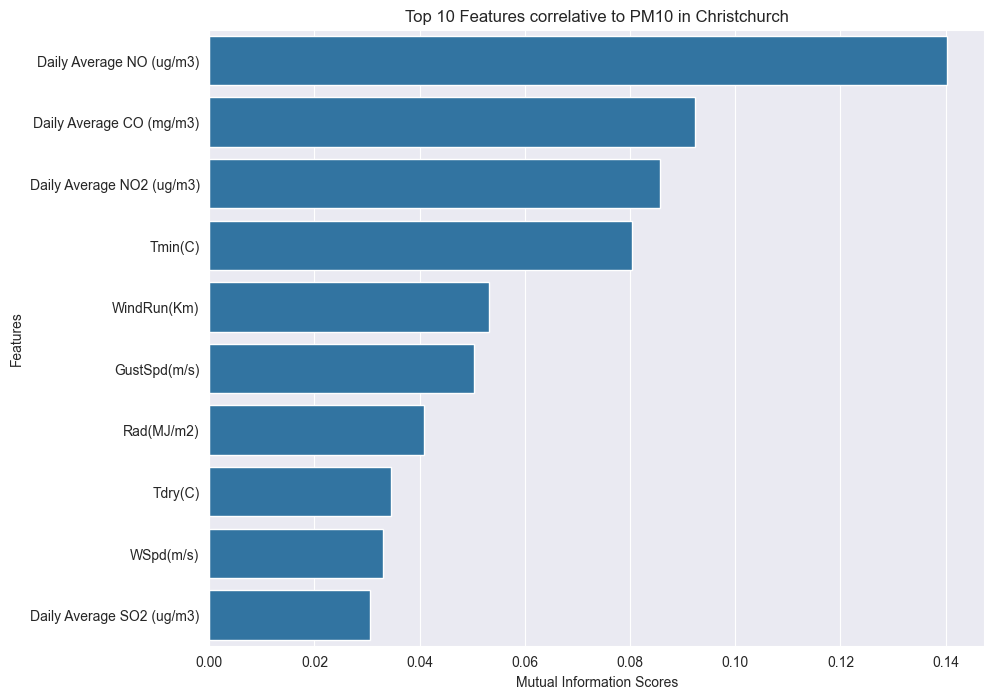

In [56]:
# Assuming PM10 as target feature
X = air_df06.drop(['Daily Average PM2.5 (ug/m3)', 'Daily Average PM10 (ug/m3)', 'T(C)', 'trafficCount'], axis=1)
y = air_df06['Daily Average PM10 (ug/m3)']

# Select 10 best variables using ANOVA
selector = SelectKBest(mutual_info_regression, k=10)
selector.fit(X, y)

support = selector.get_support()
features = X.loc[:,support].columns.tolist()
scores = selector.scores_[support]

features_scores = pd.DataFrame({'Feature': features, 'Score': scores})
features_scores = features_scores.sort_values(by='Score', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Score', y='Feature', data=features_scores)
plt.title('Top 10 Features correlative to PM10 in Christchurch')
plt.xlabel('Mutual Information Scores')
plt.ylabel('Features')
plt.show()

### NO2

In [57]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['NO and PM2.5', 'NO and PM10'])

unique_years = air_df01['Year'].unique()
color_map = {year: color for year, color in zip(unique_years, colors)}

def add_scatter_traces(fig, x, y, row, col, show_legend):
    for year in unique_years:
        filtered_data = air_df01[air_df01['Year'] == year]
        fig.add_trace(
            go.Scatter(x=filtered_data[x], y=filtered_data[y], mode='markers', name=str(year),
                       marker=dict(color=color_map[year]), showlegend=show_legend),
            row=row, col=col
        )

add_scatter_traces(fig, 'Daily Average NO (ug/m3)', 'Daily Average PM2.5 (ug/m3)', 1, 1, True)
add_scatter_traces(fig, 'Daily Average NO (ug/m3)', 'Daily Average PM10 (ug/m3)', 1, 2, False)

fig.update_layout(height=600, width=800, title_text="NO and Air Quality Relationships in Christchurch")
fig.update_xaxes(title_text="NO (ug/m3)")
fig.update_yaxes(title_text="PM2.5 (ug/m3)", row=1, col=1)
fig.update_yaxes(title_text="PM10 (ug/m3)", row=1, col=2)

fig.show()

### CO

In [58]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['CO and PM2.5', 'CO and PM10'])

unique_years = air_df01['Year'].unique()
color_map = {year: color for year, color in zip(unique_years, colors)}

def add_scatter_traces(fig, x, y, row, col, show_legend):
    for year in unique_years:
        filtered_data = air_df01[air_df01['Year'] == year]
        fig.add_trace(
            go.Scatter(x=filtered_data[x], y=filtered_data[y], mode='markers', name=str(year),
                       marker=dict(color=color_map[year]), showlegend=show_legend),
            row=row, col=col
        )

add_scatter_traces(fig, 'Daily Average CO (mg/m3)', 'Daily Average PM2.5 (ug/m3)', 1, 1, True)
add_scatter_traces(fig, 'Daily Average CO (mg/m3)', 'Daily Average PM10 (ug/m3)', 1, 2, False)

fig.update_layout(height=600, width=800, title_text="CO and Air Quality Relationships in Christchurch")
fig.update_xaxes(title_text="CO (mg/m3)")
fig.update_yaxes(title_text="PM2.5 (ug/m3)", row=1, col=1)
fig.update_yaxes(title_text="PM10 (ug/m3)", row=1, col=2)

fig.show()

### Wind speed

In [59]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Wind Speed and PM2.5', 'Wind Speed and PM10'])

unique_years = air_df01['Year'].unique()
color_map = {year: color for year, color in zip(unique_years, colors)}

def add_scatter_traces(fig, x, y, row, col, show_legend):
    for year in unique_years:
        filtered_data = air_df01[air_df01['Year'] == year]
        fig.add_trace(
            go.Scatter(x=filtered_data[x], y=filtered_data[y], mode='markers', name=str(year),
                       marker=dict(color=color_map[year]), showlegend=show_legend),
            row=row, col=col
        )

add_scatter_traces(fig, 'WSpd(m/s)', 'Daily Average PM2.5 (ug/m3)', 1, 1, False)
add_scatter_traces(fig, 'WSpd(m/s)', 'Daily Average PM10 (ug/m3)', 1, 2, False)

fig.update_layout(height=600, width=800, title_text="Wind Speed and Air Quality Relationships in Christchurch")
fig.update_xaxes(title_text="Wind Speed (m/s)")
fig.update_yaxes(title_text="PM2.5 (ug/m3)", row=1, col=1)
fig.update_yaxes(title_text="PM10 (ug/m3)", row=1, col=2)

fig.show()

### Temperature

In [60]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Temperature and PM2.5', 'Temperature and PM10'])

unique_years = air_df01['Year'].unique()
color_map = {year: color for year, color in zip(unique_years, colors)}

def add_scatter_traces(fig, x, y, row, col, show_legend):
    for year in unique_years:
        filtered_data = air_df01[air_df01['Year'] == year]
        fig.add_trace(
            go.Scatter(x=filtered_data[x], y=filtered_data[y], mode='markers', name=str(year),
                       marker=dict(color=color_map[year]), showlegend=show_legend),
            row=row, col=col
        )

add_scatter_traces(fig, 'T(C)', 'Daily Average PM2.5 (ug/m3)', 1, 1, False)
add_scatter_traces(fig, 'T(C)', 'Daily Average PM10 (ug/m3)', 1, 2, False)

fig.update_layout(height=600, width=800, title_text="Temperature and Air Quality Relationships in CHristchurch")
fig.update_xaxes(title_text="Temperature (\u00B0C)")
fig.update_yaxes(title_text="PM2.5 (ug/m3)", row=1, col=1)
fig.update_yaxes(title_text="PM10 (ug/m3)", row=1, col=2)

fig.show()

### Relative humidity

In [61]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Humidity and PM2.5', 'Humidity and PM10'])

unique_years = air_df01['Year'].unique()
color_map = {year: color for year, color in zip(unique_years, colors)}

def add_scatter_traces(fig, x, y, row, col, show_legend):
    for year in unique_years:
        filtered_data = air_df01[air_df01['Year'] == year]
        fig.add_trace(
            go.Scatter(x=filtered_data[x], y=filtered_data[y], mode='markers', name=str(year),
                       marker=dict(color=color_map[year]), showlegend=show_legend),
            row=row, col=col
        )

add_scatter_traces(fig, 'RH(%)', 'Daily Average PM2.5 (ug/m3)', 1, 1, False)
add_scatter_traces(fig, 'RH(%)', 'Daily Average PM10 (ug/m3)', 1, 2, False)

fig.update_layout(height=600, width=800, title_text="Relative Humidity and Air Quality Relationships in Christchurch")
fig.update_xaxes(title_text="Humidity (%)")
fig.update_yaxes(title_text="PM2.5 (ug/m3)", row=1, col=1)
fig.update_yaxes(title_text="PM10 (ug/m3)", row=1, col=2)

fig.show()

### Traffic count

In [62]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Traffic and PM2.5', 'Traffic and PM10'])

unique_years = air_df01['Year'].unique()
color_map = {year: color for year, color in zip(unique_years, colors)}

def add_scatter_traces(fig, x, y, row, col, show_legend):
    for year in unique_years:
        filtered_data = air_df01[air_df01['Year'] == year]
        fig.add_trace(
            go.Scatter(x=filtered_data[x], y=filtered_data[y], mode='markers', name=str(year),
                       marker=dict(color=color_map[year]), showlegend=show_legend),
            row=row, col=col
        )

add_scatter_traces(fig, 'trafficCount', 'Daily Average PM2.5 (ug/m3)', 1, 1, False)
add_scatter_traces(fig, 'trafficCount', 'Daily Average PM10 (ug/m3)', 1, 2, False)

fig.update_layout(height=600, width=800, title_text="Traffic and Air Quality Relationships in Christchurch")
fig.update_xaxes(title_text="Traffic Flow")
fig.update_yaxes(title_text="PM2.5 (ug/m3)", row=1, col=1)
fig.update_yaxes(title_text="PM10 (ug/m3)", row=1, col=2)

fig.show()